# Modularbeit für DAT WS 23/24 von Andreas Hecht und Eva-Maria Maurer

## Gliederung

* [Aufgabe 1](#Aufgabe1)
    * [Teilaufgabe 1a](#Teilaufgabe_1a)
    * [Teilaufgabe 1b](#Teilaufgabe_1b)
    * [Teilaufgabe 1c](#Teilaufgabe_1c)
    * [Teilaufgabe 1d](#Teilaufgabe_1d)

* [Aufgabe 2](#Aufgabe2)
    * [Teilaufgabe 2a](#Teilaufgabe_2a)
    * [Teilaufgabe 2b](#Teilaufgabe_2b)
    * [Teilaufgabe 2c](#Teilaufgabe_2c)
    * [Teilaufgabe 2d](#Teilaufgabe_2d)
    * [Teilaufgabe 2e](#Teilaufgabe_2e)
    * [Teilaufgabe 2f](#Teilaufgabe_2f)
    
* [Aufgabe 3](#Aufgabe3)
    * [Teilaufgabe 3a](#Teilaufgabe_3a)
    * [Teilaufgabe 3b](#Teilaufgabe_3b)
    * [Teilaufgabe 3c](#Teilaufgabe_3c)
    * [Teilaufgabe 3d](#Teilaufgabe_3d)
    * [Teilaufgabe 3e](#Teilaufgabe_3e)
    * [Teilaufgabe 3f](#Teilaufgabe_3f)
    
* [Aufgabe 4](#Aufgabe4)
    * [Teilaufgabe 4a](#Teilaufgabe_4a)
    * [Teilaufgabe 4b](#Teilaufgabe_4b)
    * [Teilaufgabe 4c](#Teilaufgabe_4c)
    * [Teilaufgabe 4d](#Teilaufgabe_4d)
    * [Teilaufgabe 4e](#Teilaufgabe_4e)
    * [Teilaufgabe 4f](#Teilaufgabe_4f)
    * [Teilaufgabe 4g](#Teilaufgabe_4g)
    
* [Aufgabe 5](#Aufgabe5)
    * [Teilaufgabe 5a](#Teilaufgabe_5a)
    * [Teilaufgabe 5b](#Teilaufgabe_5b)
    * [Teilaufgabe 5c](#Teilaufgabe_5c)
    * [Teilaufgabe 5d](#Teilaufgabe_5d)
    * [Teilaufgabe 5e](#Teilaufgabe_5e)
    * [Teilaufgabe 5f](#Teilaufgabe_5f)
    * [Teilaufgabe 5g](#Teilaufgabe_5g)
    * [Teilaufgabe 5h](#Teilaufgabe_5h)
    * [Teilaufgabe 5i](#Teilaufgabe_5i)
    * [Teilaufgabe 5j](#Teilaufgabe_5j)
    
* [Aufgabe 6](#Aufgabe6)
    * [Teilaufgabe 6a](#Teilaufgabe_6a)
    * [Teilaufgabe 6b](#Teilaufgabe_6b)
    * [Teilaufgabe 6c](#Teilaufgabe_6c)
* [Quellenverzeichnis](#Quellenverzeichnis)

# Aufgabe1  

Falls import Fehler Auftritt: Entkommentieren der pip install Befehle 

In [1]:
#%pip install openmeteo_requests
#%pip install requests_cache 
#%pip install retry_requests 
#%pip install calplot 
#%pip install wordcloud

Importieren der verwendeten packages:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
import openmeteo_requests
import requests_cache
from retry_requests import retry
import plotly.graph_objects as go
import calplot
import folium
import folium.plugins
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as skm
from sklearn.metrics import mean_absolute_percentage_error

### Teilaufgabe_1a

Einlesen aller CSV Dateien für die erste Aufgabe:

In [4]:
df_2018 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2018.csv")
df_2019 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2019.csv")
df_2020 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2020.csv")
df_2021 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2021.csv")
df_2022 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2022.csv")
df_2023 = pd.read_csv(r"Daten\Nettostromerzeugung\Nettostromerzeugung_in_Deutschland_2023.csv")

df_2023

Tag  Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  \
0    01.01.2023             58.91            41.18         119.37   
1    02.01.2023             58.91            41.23         122.50   
2    03.01.2023             58.93            43.86         124.48   
3    04.01.2023             58.31            43.28         124.04   
4    05.01.2023             57.96            43.30         126.50   
..          ...               ...              ...            ...   
360  27.12.2023              0.00            58.08         120.08   
361  28.12.2023              0.00            56.76         121.76   
362  29.12.2023              0.00            54.64         122.82   
363  30.12.2023              0.00            53.26         123.31   
364  31.12.2023              0.00            53.86         124.90   

     Braunkohle(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  Geothermie(GWh)  \
0              97.60            47.00     7.37        50.60             0.60   
1             256.08            72.36     7.34        72.60             0.61   
2             315.82           150.19     7.22       104.04             0.63   
3             121.73           118.06     7.14        71.86             0.60   
4             210.60           149.82     7.26       106.90             0.58   
..               ...              ...      ...          ...              ...   
360           109.89            43.47     9.61       125.11             0.49   
361            77.25            59.71    10.48        77.81             0.49   
362            74.39            60.77     9.31        71.84             0.49   
363            78.90            53.99     9.37        79.68             0.49   
364            78.01            48.26     9.43        70.11             0.49   

     Speicherwasser(GWh)  Andere(GWh)  Erneuerbarer Müll(GWh)  \
0                   1.41         4.50                   11.86   
1                   1.52         5.25                   12.33   
2                   1.42         6.58                   11.85   
3                   1.51         4.65                    8.68   
4                   1.61         6.01                    8.40   
..                   ...          ...                     ...   
360                 2.76         6.78                   13.40   
361                 1.54         4.90                   13.28   
362                 2.32         4.90                   12.84   
363                 2.52         5.78                   12.78   
364                 3.02         5.07                   12.76   

     Nicht-erneuerbarer Müll(GWh)  Wind Offshore(GWh)  Wind Onshore(GWh)  \
0                           13.38              109.01             543.99   
1                           13.92               85.47             563.27   
2                           13.38              101.90             317.32   
3                            9.80              124.67             935.77   
4                            9.48               61.97             616.65   
..                            ...                 ...                ...   
360                         15.12               97.21             391.67   
361                         14.99              125.05             866.36   
362                         14.49              130.80             910.13   
363                         14.42              135.20             613.28   
364                         14.40              136.91             614.10   

     Solar(GWh)  
0         43.50  
1         33.72  
2         44.22  
3         13.44  
4         22.45  
..          ...  
360       51.65  
361       32.45  
362       30.52  
363       47.41  
364       26.35  

[365 rows x 16 columns]

Zusammenführen der DataFrames:

In [5]:
listOfDFs = [df_2018,df_2019,df_2020,df_2021,df_2022,df_2023]
df_el = pd.concat(listOfDFs)
df_el

Tag  Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  \
0    01.01.2018             156.8            46.70         126.60   
1    02.01.2018             220.9            47.10         128.30   
2    03.01.2018             196.0            48.80         127.70   
3    04.01.2018             216.8            51.80         128.40   
4    05.01.2018             209.6            52.00         128.70   
..          ...               ...              ...            ...   
360  27.12.2023               0.0            58.08         120.08   
361  28.12.2023               0.0            56.76         121.76   
362  29.12.2023               0.0            54.64         122.82   
363  30.12.2023               0.0            53.26         123.31   
364  31.12.2023               0.0            53.86         124.90   

     Braunkohle(GWh)  Kohlegas(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  \
0             204.50            8.9            43.60     2.30        66.30   
1             355.10           10.4           107.60     2.40       117.90   
2             248.00            8.3            65.30     2.30        92.10   
3             319.90            9.1           176.60     2.30       113.20   
4             338.50            9.0           192.90     2.30       123.40   
..               ...            ...              ...      ...          ...   
360           109.89            NaN            43.47     9.61       125.11   
361            77.25            NaN            59.71    10.48        77.81   
362            74.39            NaN            60.77     9.31        71.84   
363            78.90            NaN            53.99     9.37        79.68   
364            78.01            NaN            48.26     9.43        70.11   

     Geothermie(GWh)  Speicherwasser(GWh)  Andere(GWh)  \
0               0.40                 1.10         1.20   
1               0.40                 1.20         1.60   
2               0.40                 1.50         1.40   
3               0.40                 1.70         1.50   
4               0.40                 1.50         1.40   
..               ...                  ...          ...   
360             0.49                 2.76         6.78   
361             0.49                 1.54         4.90   
362             0.49                 2.32         4.90   
363             0.49                 2.52         5.78   
364             0.49                 3.02         5.07   

     Erneuerbarer Müll(GWh)  Nicht-erneuerbarer Müll(GWh)  Wind Offshore(GWh)  \
0                     13.10                         15.10               76.40   
1                     13.30                         15.20               63.90   
2                     14.30                         16.40               92.30   
3                     13.90                         15.90               37.60   
4                     12.80                         14.70               28.00   
..                      ...                           ...                 ...   
360                   13.40                         15.12               97.21   
361                   13.28                         14.99              125.05   
362                   12.84                         14.49              130.80   
363                   12.78                         14.42              135.20   
364                   12.76                         14.40              136.91   

     Wind Onshore(GWh)  Solar(GWh)  
0               609.60       31.10  
1               393.20       17.20  
2               820.20       13.80  
3               551.90        9.80  
4               512.30       19.40  
..                 ...         ...  
360             391.67       51.65  
361             866.36       32.45  
362             910.13       30.52  
363             613.28       47.41  
364             614.10       26.35  

[2191 rows x 17 columns]

### Teilaufgabe_1b

Anpassen der dtypes der Spalten:

In [6]:
df_el["Tag"] = pd.to_datetime(df_el["Tag"],format = "%d.%m.%Y")
df_el.dtypes

Tag                             datetime64[ns]
Kernenergie(GWh)                       float64
Laufwasser(GWh)                        float64
Biomasse(GWh)                          float64
Braunkohle(GWh)                        float64
Kohlegas(GWh)                          float64
Steinkohle(GWh)                        float64
Öl(GWh)                                float64
Erdgas(GWh)                            float64
Geothermie(GWh)                        float64
Speicherwasser(GWh)                    float64
Andere(GWh)                            float64
Erneuerbarer Müll(GWh)                 float64
Nicht-erneuerbarer Müll(GWh)           float64
Wind Offshore(GWh)                     float64
Wind Onshore(GWh)                      float64
Solar(GWh)                             float64
dtype: object

### Teilaufgabe_1c

Überprüfen auf fehlende Werte:

In [7]:
df_el.isnull().sum()

Tag                                0
Kernenergie(GWh)                   0
Laufwasser(GWh)                    0
Biomasse(GWh)                      0
Braunkohle(GWh)                    0
Kohlegas(GWh)                   1461
Steinkohle(GWh)                    0
Öl(GWh)                            0
Erdgas(GWh)                        0
Geothermie(GWh)                    0
Speicherwasser(GWh)                0
Andere(GWh)                        0
Erneuerbarer Müll(GWh)             0
Nicht-erneuerbarer Müll(GWh)       0
Wind Offshore(GWh)                 0
Wind Onshore(GWh)                  0
Solar(GWh)                         0
dtype: int64

1461 null Werte in der Kohlegas Reihe gefunden, ausgeben der Reihe um eine geeignete Strategie zu formulieren:

In [8]:
df_el["Kohlegas(GWh)"]

0       8.9
1      10.4
2       8.3
3       9.1
4       9.0
       ... 
360     NaN
361     NaN
362     NaN
363     NaN
364     NaN
Name: Kohlegas(GWh), Length: 2191, dtype: float64

Festellung: Vermutlich wurden die Kohlegas Kraftwerke abgeschalten, weshalb keine Energie mehr Produziert wird. Die NaN Werte werden als 0 interpretiert.

In [9]:
df_el["Kohlegas(GWh)"] = df_el["Kohlegas(GWh)"].fillna(0)
df_el

Tag  Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  \
0   2018-01-01             156.8            46.70         126.60   
1   2018-01-02             220.9            47.10         128.30   
2   2018-01-03             196.0            48.80         127.70   
3   2018-01-04             216.8            51.80         128.40   
4   2018-01-05             209.6            52.00         128.70   
..         ...               ...              ...            ...   
360 2023-12-27               0.0            58.08         120.08   
361 2023-12-28               0.0            56.76         121.76   
362 2023-12-29               0.0            54.64         122.82   
363 2023-12-30               0.0            53.26         123.31   
364 2023-12-31               0.0            53.86         124.90   

     Braunkohle(GWh)  Kohlegas(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  \
0             204.50            8.9            43.60     2.30        66.30   
1             355.10           10.4           107.60     2.40       117.90   
2             248.00            8.3            65.30     2.30        92.10   
3             319.90            9.1           176.60     2.30       113.20   
4             338.50            9.0           192.90     2.30       123.40   
..               ...            ...              ...      ...          ...   
360           109.89            0.0            43.47     9.61       125.11   
361            77.25            0.0            59.71    10.48        77.81   
362            74.39            0.0            60.77     9.31        71.84   
363            78.90            0.0            53.99     9.37        79.68   
364            78.01            0.0            48.26     9.43        70.11   

     Geothermie(GWh)  Speicherwasser(GWh)  Andere(GWh)  \
0               0.40                 1.10         1.20   
1               0.40                 1.20         1.60   
2               0.40                 1.50         1.40   
3               0.40                 1.70         1.50   
4               0.40                 1.50         1.40   
..               ...                  ...          ...   
360             0.49                 2.76         6.78   
361             0.49                 1.54         4.90   
362             0.49                 2.32         4.90   
363             0.49                 2.52         5.78   
364             0.49                 3.02         5.07   

     Erneuerbarer Müll(GWh)  Nicht-erneuerbarer Müll(GWh)  Wind Offshore(GWh)  \
0                     13.10                         15.10               76.40   
1                     13.30                         15.20               63.90   
2                     14.30                         16.40               92.30   
3                     13.90                         15.90               37.60   
4                     12.80                         14.70               28.00   
..                      ...                           ...                 ...   
360                   13.40                         15.12               97.21   
361                   13.28                         14.99              125.05   
362                   12.84                         14.49              130.80   
363                   12.78                         14.42              135.20   
364                   12.76                         14.40              136.91   

     Wind Onshore(GWh)  Solar(GWh)  
0               609.60       31.10  
1               393.20       17.20  
2               820.20       13.80  
3               551.90        9.80  
4               512.30       19.40  
..                 ...         ...  
360             391.67       51.65  
361             866.36       32.45  
362             910.13       30.52  
363             613.28       47.41  
364             614.10       26.35  

[2191 rows x 17 columns]

### Teilaufgabe_1d

In [10]:
# Hier wird überprüft, ob es Duplikate Tage gibt. Da es 2191 Zeilen und 2191 unique Einträge gibt, gibt es keine Duplikate.
df_el["Tag"].nunique()

2191

Die Qualität der Daten scheint sehr gut zu sein, da keine sinnlosen NaN werte und keine Duplikate enthalten sind

# Aufgabe2
### Teilaufgabe_2a

Ausgabe der 10 Tage, an denen am meisten Strom erzeugt wurde:

In [11]:
#Erstellen eines neuen DF, mit dem Datum als Index um die Sum funktion anwenden zu können
df_el = df_el.set_index("Tag")
df_el["Gesamt (GWh)"] = df_el.sum(axis = 1)
df_el["Gesamt (GWh)"].nlargest(10)

Tag
2018-03-01    1936.3
2018-02-28    1934.6
2019-01-15    1887.6
2018-02-23    1878.6
2019-01-17    1876.7
2018-03-02    1870.0
2018-02-26    1869.7
2019-01-08    1860.3
2018-02-27    1854.4
2019-01-30    1846.7
Name: Gesamt (GWh), dtype: float64

### Teilaufgabe_2b

Tag, an dem am meisten Windstrom erzeugt wurde:

In [12]:
df_el["Wind Gesamt(GWh)"] = df_el["Wind Offshore(GWh)"] + df_el["Wind Onshore(GWh)"]
df_el["Wind Gesamt(GWh)"].idxmax()

Timestamp('2023-12-21 00:00:00')

### Teilaufgabe_2c

Ermitteln, Visualisierung wie viel Strom mit jedem Energieträger 2018-2023 jährlich erzeugt wurde:

In [13]:
df_el_by_year = df_el.groupby(pd.Grouper(freq="Y")).sum()
df_el_by_year["Jahr"] = ["2018","2019","2020","2021","2022","2023"]
df_el_by_year = df_el_by_year.set_index("Jahr")

In [14]:
df_el_by_year = df_el_by_year.drop(columns = ["Gesamt (GWh)", "Wind Gesamt(GWh)"])

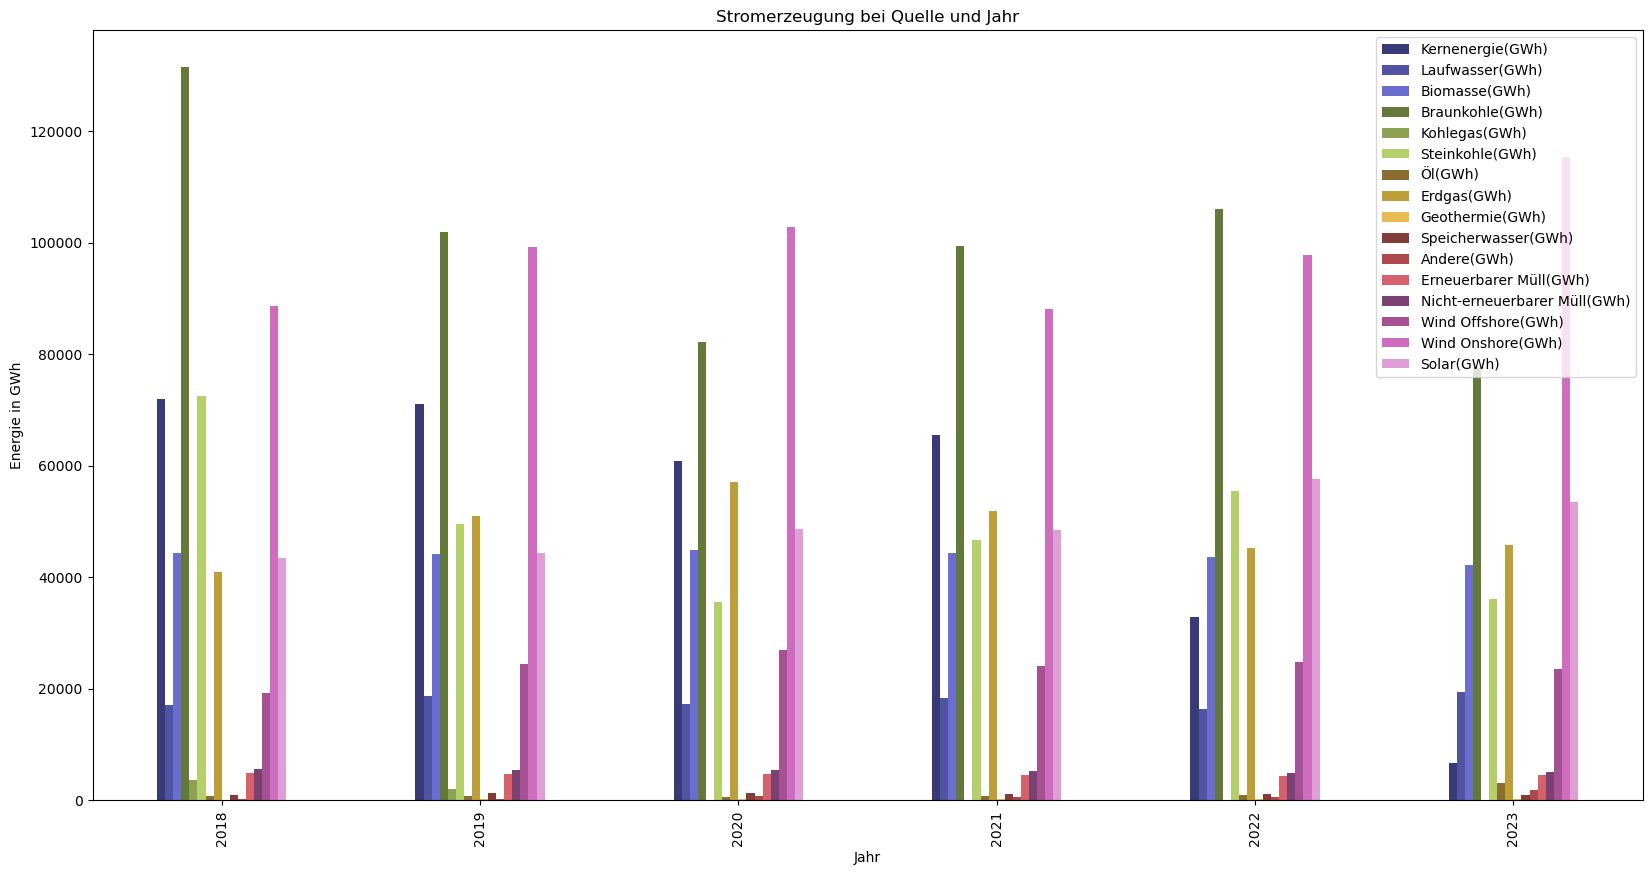

In [15]:
fig = df_el_by_year.plot(kind = "bar", figsize = (20,10), title = "Stromerzeugung bei Quelle und Jahr", ylabel = "Energie in GWh",colormap = "tab20b")

### Teilaufgabe_2d

In [16]:
df_solar_greater_30_percent = df_el.loc[(df_el['Solar(GWh)']/(df_el["Gesamt (GWh)"]) > 0.30)]
print("Tage mit über 30% durch Solarstrom:", df_solar_greater_30_percent.shape[0])

Tage mit über 30% durch Solarstrom: 32


### Teilaufgabe_2e

Verteilung des täglich erzeugten Windstroms, On- und Offshore getrennt

In [17]:
onshore_df = pd.DataFrame(df_el["Wind Onshore(GWh)"])
onshore_df

Wind Onshore(GWh)
Tag                          
2018-01-01             609.60
2018-01-02             393.20
2018-01-03             820.20
2018-01-04             551.90
2018-01-05             512.30
...                       ...
2023-12-27             391.67
2023-12-28             866.36
2023-12-29             910.13
2023-12-30             613.28
2023-12-31             614.10

[2191 rows x 1 columns]

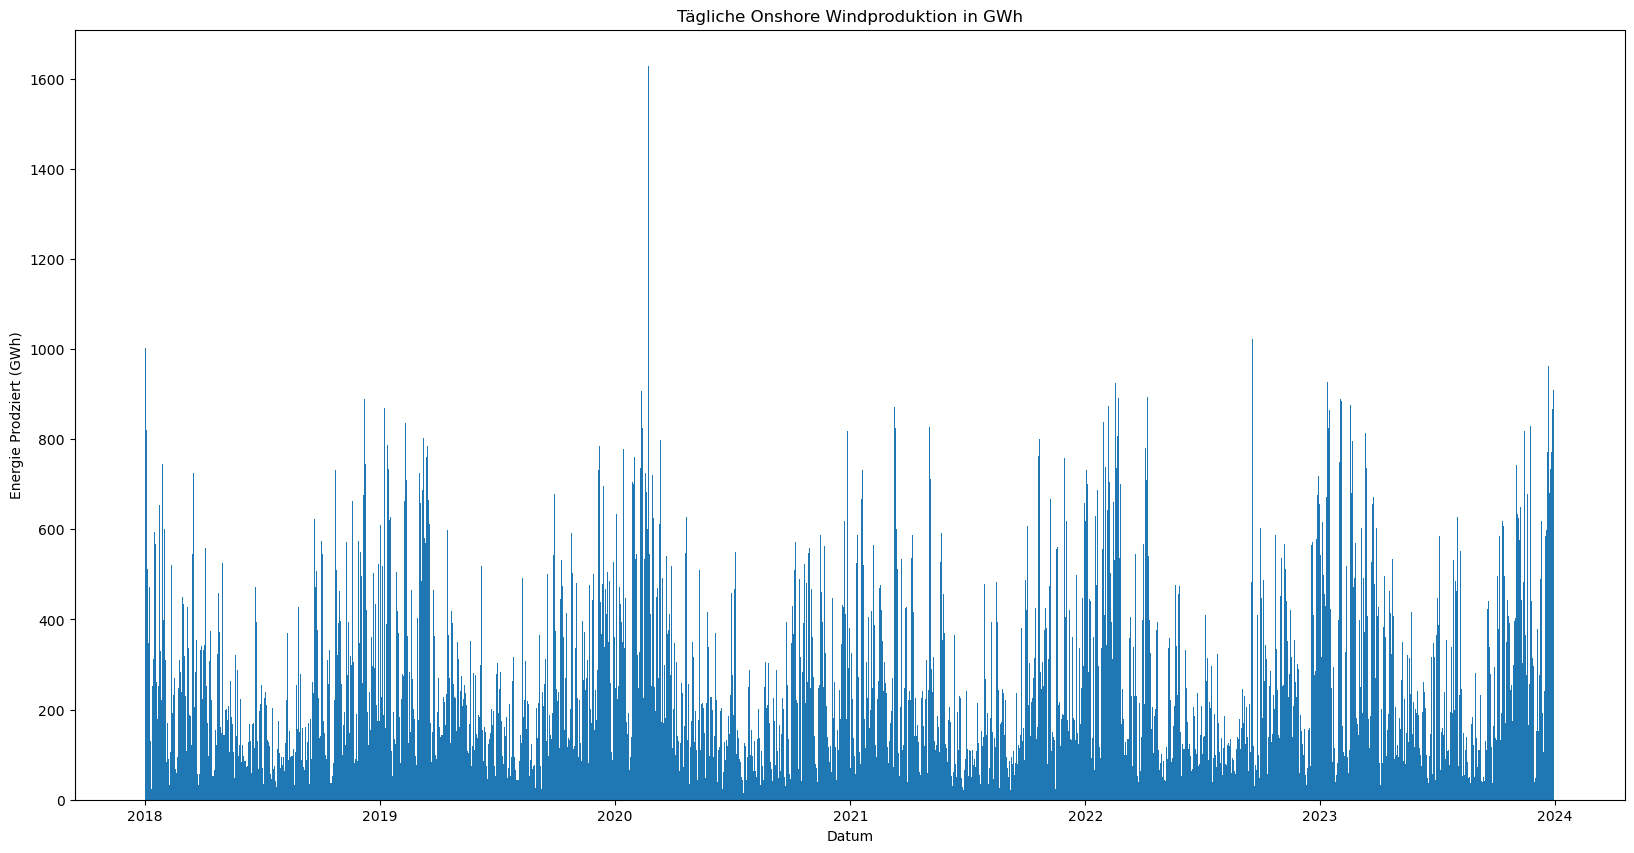

In [18]:
onshore_df['Date'] = pd.to_datetime(onshore_df.index) 

plt.figure(figsize=(20, 10))
plt.hist(onshore_df['Date'], bins=2176, weights=onshore_df['Wind Onshore(GWh)'])

plt.xlabel('Datum')
plt.ylabel('Energie Prodziert (GWh)')
plt.title('Tägliche Onshore Windproduktion in GWh')

plt.show()

In [19]:
offshore_df = pd.DataFrame(df_el["Wind Offshore(GWh)"])
offshore_df

Wind Offshore(GWh)
Tag                           
2018-01-01               76.40
2018-01-02               63.90
2018-01-03               92.30
2018-01-04               37.60
2018-01-05               28.00
...                        ...
2023-12-27               97.21
2023-12-28              125.05
2023-12-29              130.80
2023-12-30              135.20
2023-12-31              136.91

[2191 rows x 1 columns]

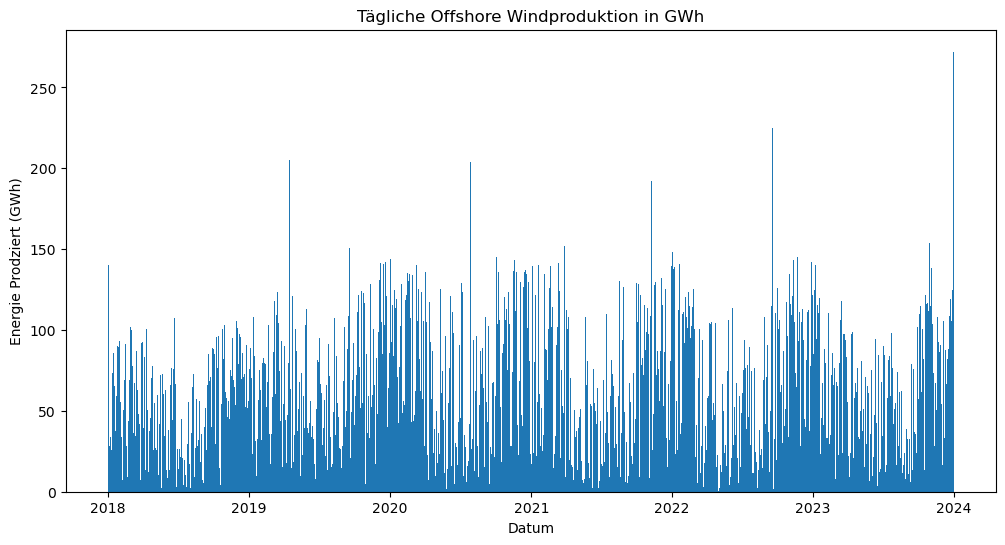

In [20]:
offshore_df['Date'] = pd.to_datetime(offshore_df.index) 

plt.figure(figsize=(12, 6))
plt.hist(offshore_df['Date'], bins=2176, weights=offshore_df['Wind Offshore(GWh)'])

plt.xlabel('Datum')
plt.ylabel('Energie Prodziert (GWh)')
plt.title('Tägliche Offshore Windproduktion in GWh')

plt.show()

 In den Diagrammen erkennt man, dass die, durch Wind produzierte Energie im Sommer stark zunimmt, dies ist dadurch zu erklären, dass die Sonneneinstrahlung im Sommer höher ist, und durch Sonneneinstrahlung Wind entsteht.
Die On-Shore Produktion ist größer, da 28.230 On-Shore Anlagen zum ende 2021 auf 1.501 Off-Shore Anlagen kommen. [[1]](https://www.enbw.com/unternehmen/eco-journal/offshore-windparks-alle-fakten-zur-windenergie-auf-see.html#:~:text=Ende%202021%20war%20die%20Anzahl,an%20Offshore-Anlagen%20mit%201.501.) 

### Teilaufgabe_2f

Statistische Kenngrößen für den täglich erzeugten Solarstrom pro Jahr

2018
count    365.000000
mean     119.163014
std       75.444009
min        6.900000
25%       44.200000
50%      119.700000
75%      181.600000
max      271.800000
Name: Solar(GWh), dtype: float64
--------------------------
2019
count    365.000000
mean     121.602466
std       77.134277
min        5.700000
25%       49.300000
50%      116.100000
75%      185.300000
max      280.100000
Name: Solar(GWh), dtype: float64
--------------------------
2020
count    366.000000
mean     132.724590
std       84.286585
min        9.000000
25%       50.625000
50%      126.900000
75%      208.675000
max      307.900000
Name: Solar(GWh), dtype: float64
--------------------------
2021
count    365.000000
mean     132.680548
std       86.665768
min        5.600000
25%       46.200000
50%      132.000000
75%      200.400000
max      333.200000
Name: Solar(GWh), dtype: float64
--------------------------
2022
count    365.000000
mean     157.829863
std       98.948537
min        6.800000
25%       61.60

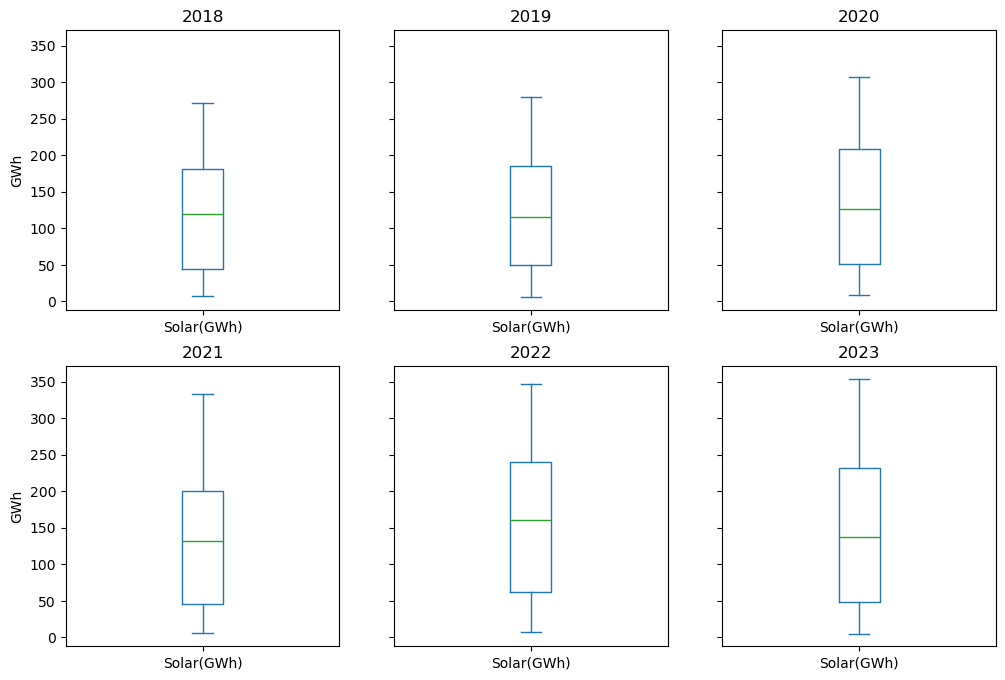

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12, 8), sharey = True)

years = {2018, 2019, 2020, 2021, 2022, 2023}
for i , year in enumerate(years): 
    row = i // 3
    col = i % 3
    df_year = df_el.loc[pd.to_datetime(df_el.index).year == year]["Solar(GWh)"]
    plot = df_year.plot(kind="box", ylabel="GWh", title=str(year), y=col, ax=axes[row, col])
    print(year)
    print(df_year.describe())
    print("--------------------------")

Obwohl sich die Sonneneinstrahlung kaum verändert hat, ist ein anstieg in der Energieproduktion durch Solar festzustellen. Dieser Anstieg ist durch den deutlichen Ausbau der PV Anlagen im Betrachtungszeitraum zu erklären. Die erhöhte Varianz ist durch die Inbetriebnahme einzlner extrem großer PV Anlagen (vergleiche Aufgabe 5e) zu erklären, da hierdurch die Produktion stärker schwankt, je nachdem wie das Wetter an diesen Standorten ist.

# Aufgabe 3

### Teilaufgabe_3a

Visualisierung zur monatlichen Stromerzeugung. 

In [22]:
monthly_total_df = df_el["Gesamt (GWh)"]
monthly_total_df

Tag
2018-01-01    1403.70
2018-01-02    1495.70
2018-01-03    1748.80
2018-01-04    1650.80
2018-01-05    1646.90
               ...   
2023-12-27    1045.32
2023-12-28    1462.83
2023-12-29    1500.26
2023-12-30    1230.39
2023-12-31    1197.67
Name: Gesamt (GWh), Length: 2191, dtype: float64

In [23]:
monthly_total_df = monthly_total_df.groupby(pd.Grouper(freq='M')).sum()

In [24]:
monthly_total_df = monthly_total_df.rename(index=lambda x: x.strftime('%B %Y'))

<Axes: title={'center': 'Monatliche Gesamt Produktion Deutschland'}, xlabel='Tag', ylabel='Energie in GWh'>

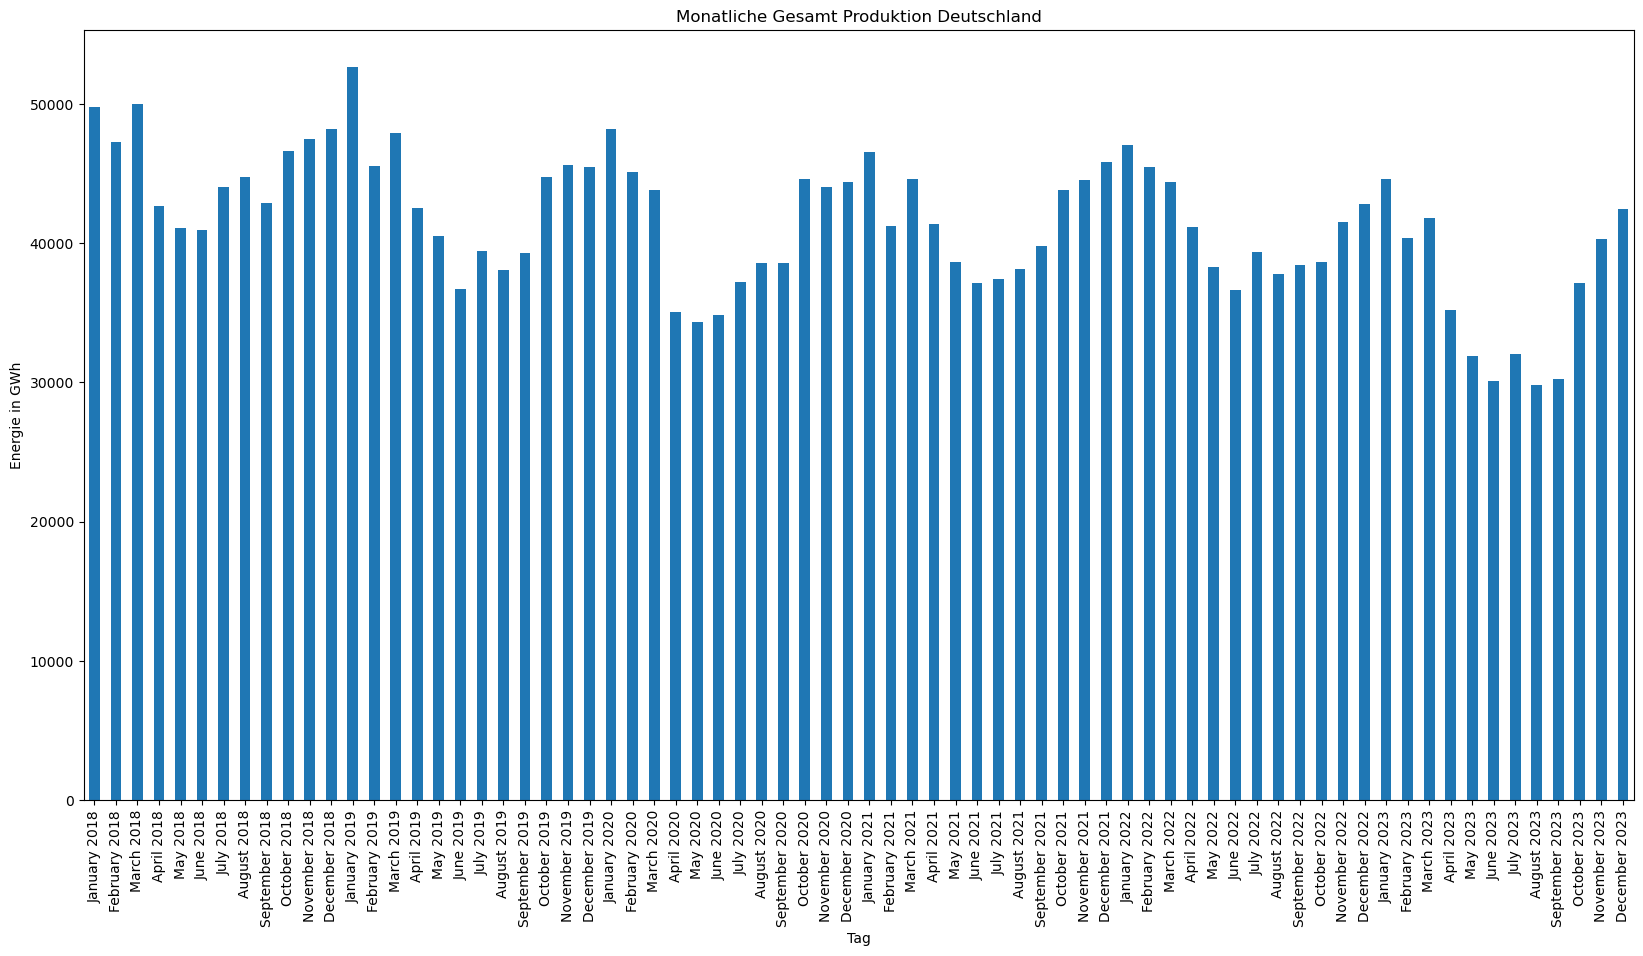

In [25]:
monthly_total_df.plot(kind="bar", figsize=(20,10), ylabel = "Energie in GWh", title = "Monatliche Gesamt Produktion Deutschland")

Prinzipiell ist ein abwärts Trend erkennbar (hiervon auszuschließen ist der Letzte Balken, Dezember 2023, da dieser noch nicht abgeschlossen ist und dadurch der Unterschied zu erklären ist). Prinzipiell ist zu erkennen, dass im Winter mehr Energie produziert wird als im Sommer, da hier mehr Licht und Wärme benötigt werden als im Sommer.

### Teilaufgabe_3b

In [26]:
weekday_total_df = df_el["Gesamt (GWh)"]
weekday_total_df = weekday_total_df.groupby(weekday_total_df.index.weekday).mean()

Wochentage: Montag = 0  Sonntag = 6


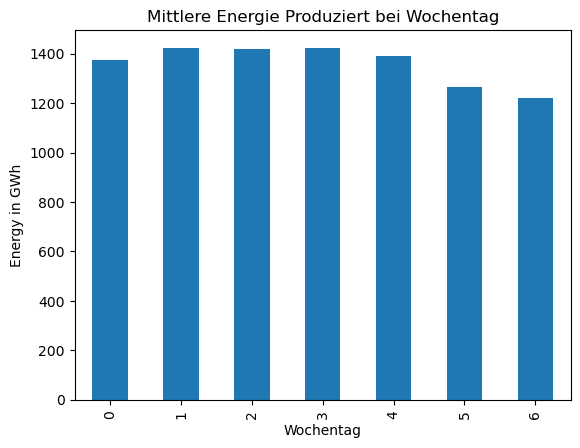

In [27]:
weekday_total_df.plot.bar(title="Mittlere Energie Produziert bei Wochentag", xlabel = "Wochentag", ylabel="Energy in GWh")
print("Wochentage: Montag = 0  Sonntag = 6")

Man erkennt, dass am Wochenende weniger Energie Produziert wird, da vermutlich weniger Energie verbraucht wird. Allerdings wird nicht sehr viel weniger produziert, da die meisten Industrie Anlagen durch das Wochenende durch laufen, und diese den Großteil des Energie-Verbrauchs darstellen.

### Teilaufgabe_3c

Klassifizierung der Energiearten:
#### Nicht-Erneuerbar:
* Kernenergie(GWh)
* Braunkohle(GWh)
* Kohlegas(GWh)
* Steinkohle(GWh)
* Öl(GWh)
* Erdgas(GWh)
* Nicht-erneuerbarer Müll(GWh)

#### Erneuerbar:
* Erneuerbarer Müll(GWh)
* Wind Offshore(GWh)
* Wind Onshore(GWh)
* Solar(GWh)
* Geothermie(GWh)
* Speicherwasser(GWh)
* Laufwasser(GWh)
* Biomasse(GWh)

#### Unbekannt:
* Andere(GWh)

In [28]:
green_split_df = df_el.copy()
green_split_df["Gesamt Erneuerbar(GWh)"] = green_split_df[["Erneuerbarer Müll(GWh)","Wind Offshore(GWh)","Wind Onshore(GWh)",
"Solar(GWh)","Geothermie(GWh)","Speicherwasser(GWh)","Laufwasser(GWh)","Biomasse(GWh)"]].sum(axis=1)
green_split_df.drop(columns = ["Erneuerbarer Müll(GWh)","Wind Offshore(GWh)","Wind Onshore(GWh)",
"Solar(GWh)","Geothermie(GWh)","Speicherwasser(GWh)","Laufwasser(GWh)","Biomasse(GWh)"], inplace = True)
green_split_df

Kernenergie(GWh)  Braunkohle(GWh)  Kohlegas(GWh)  Steinkohle(GWh)  \
Tag                                                                             
2018-01-01             156.8           204.50            8.9            43.60   
2018-01-02             220.9           355.10           10.4           107.60   
2018-01-03             196.0           248.00            8.3            65.30   
2018-01-04             216.8           319.90            9.1           176.60   
2018-01-05             209.6           338.50            9.0           192.90   
...                      ...              ...            ...              ...   
2023-12-27               0.0           109.89            0.0            43.47   
2023-12-28               0.0            77.25            0.0            59.71   
2023-12-29               0.0            74.39            0.0            60.77   
2023-12-30               0.0            78.90            0.0            53.99   
2023-12-31               0.0            78.01            0.0            48.26   

            Öl(GWh)  Erdgas(GWh)  Andere(GWh)  Nicht-erneuerbarer Müll(GWh)  \
Tag                                                                           
2018-01-01     2.30        66.30         1.20                         15.10   
2018-01-02     2.40       117.90         1.60                         15.20   
2018-01-03     2.30        92.10         1.40                         16.40   
2018-01-04     2.30       113.20         1.50                         15.90   
2018-01-05     2.30       123.40         1.40                         14.70   
...             ...          ...          ...                           ...   
2023-12-27     9.61       125.11         6.78                         15.12   
2023-12-28    10.48        77.81         4.90                         14.99   
2023-12-29     9.31        71.84         4.90                         14.49   
2023-12-30     9.37        79.68         5.78                         14.42   
2023-12-31     9.43        70.11         5.07                         14.40   

            Gesamt (GWh)  Wind Gesamt(GWh)  Gesamt Erneuerbar(GWh)  
Tag                                                                 
2018-01-01       1403.70            686.00                  905.00  
2018-01-02       1495.70            457.10                  664.60  
2018-01-03       1748.80            912.50                 1119.00  
2018-01-04       1650.80            589.50                  795.50  
2018-01-05       1646.90            540.30                  755.10  
...                  ...               ...                     ...  
2023-12-27       1045.32            488.88                  735.34  
2023-12-28       1462.83            991.41                 1217.69  
2023-12-29       1500.26           1040.93                 1264.56  
2023-12-30       1230.39            748.48                  988.25  
2023-12-31       1197.67            751.01                  972.39  

[2191 rows x 11 columns]

In [29]:
green_split_df["Gesamt Nicht-Erneuerbar(GWh)"] = green_split_df[["Kernenergie(GWh)","Braunkohle(GWh)","Kohlegas(GWh)",
                                                                 "Steinkohle(GWh)","Öl(GWh)","Erdgas(GWh)","Nicht-erneuerbarer Müll(GWh)"]].sum(axis=1)
green_split_df.drop(columns = ["Kernenergie(GWh)","Braunkohle(GWh)","Kohlegas(GWh)",
                               "Steinkohle(GWh)","Öl(GWh)","Erdgas(GWh)","Nicht-erneuerbarer Müll(GWh)","Wind Gesamt(GWh)", "Gesamt (GWh)"], inplace = True)

In [30]:
green_split_df = green_split_df.groupby(green_split_df.index.year).sum()

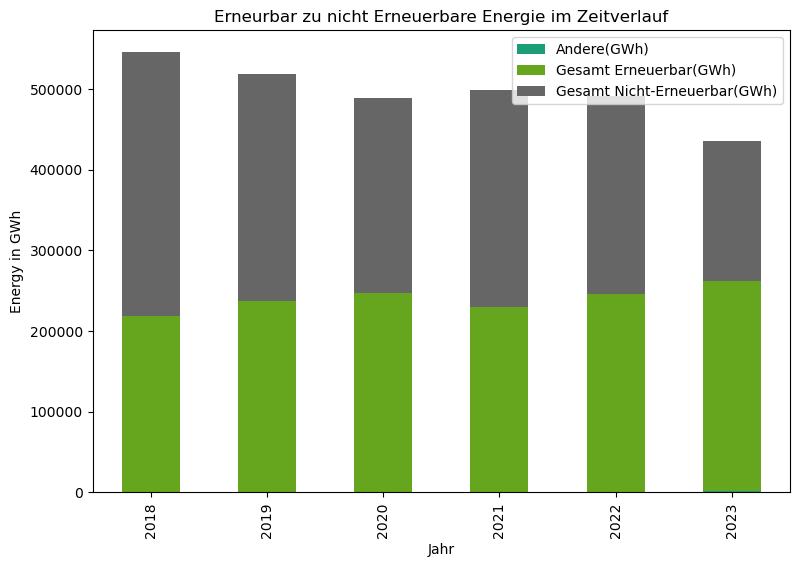

In [31]:
fig = green_split_df.plot(kind="bar", stacked = True, figsize=(9,6), colormap = "Dark2",xlabel= "Jahr", ylabel= "Energy in GWh", 
                    title = "Erneurbar zu nicht Erneuerbare Energie im Zeitverlauf")

### Teilaufgabe_3d

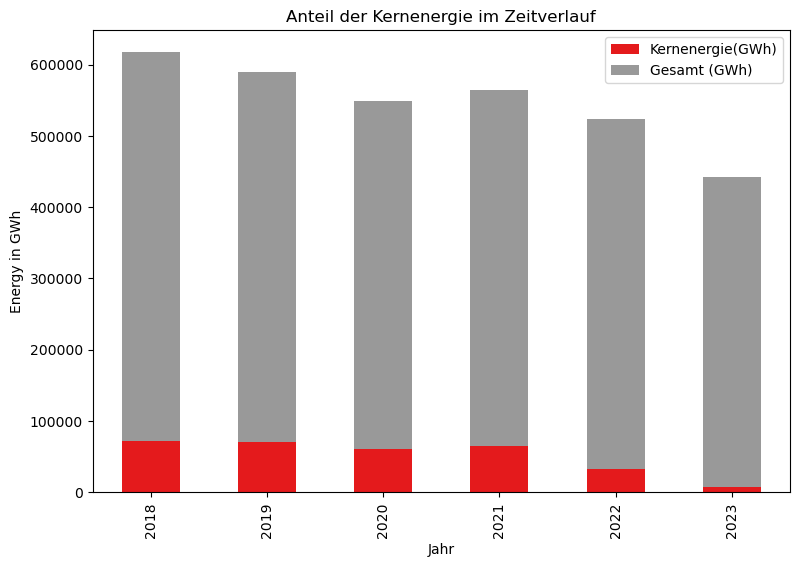

In [32]:
nuclear_part_df = df_el.groupby(df_el.index.year).sum()
nuclear_part_df = nuclear_part_df.drop( columns = ["Laufwasser(GWh)","Biomasse(GWh)","Braunkohle(GWh)","Kohlegas(GWh)","Steinkohle(GWh)",
                                        "Öl(GWh)","Erdgas(GWh)","Geothermie(GWh)","Speicherwasser(GWh)","Andere(GWh)","Erneuerbarer Müll(GWh)",
                                        "Nicht-erneuerbarer Müll(GWh)","Wind Offshore(GWh)","Wind Onshore(GWh)","Solar(GWh)","Wind Gesamt(GWh)"])
fig = nuclear_part_df.plot(kind="bar", stacked = True, figsize=(9,6), colormap = "Set1",xlabel= "Jahr", ylabel= "Energy in GWh", 
                    title = "Anteil der Kernenergie im Zeitverlauf")

### Teilaufgabe_3e

In [33]:
df_el = df_el.drop("Wind Gesamt(GWh)", axis = 1)
df_el

Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  Braunkohle(GWh)  \
Tag                                                                             
2018-01-01             156.8            46.70         126.60           204.50   
2018-01-02             220.9            47.10         128.30           355.10   
2018-01-03             196.0            48.80         127.70           248.00   
2018-01-04             216.8            51.80         128.40           319.90   
2018-01-05             209.6            52.00         128.70           338.50   
...                      ...              ...            ...              ...   
2023-12-27               0.0            58.08         120.08           109.89   
2023-12-28               0.0            56.76         121.76            77.25   
2023-12-29               0.0            54.64         122.82            74.39   
2023-12-30               0.0            53.26         123.31            78.90   
2023-12-31               0.0            53.86         124.90            78.01   

            Kohlegas(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  \
Tag                                                                
2018-01-01            8.9            43.60     2.30        66.30   
2018-01-02           10.4           107.60     2.40       117.90   
2018-01-03            8.3            65.30     2.30        92.10   
2018-01-04            9.1           176.60     2.30       113.20   
2018-01-05            9.0           192.90     2.30       123.40   
...                   ...              ...      ...          ...   
2023-12-27            0.0            43.47     9.61       125.11   
2023-12-28            0.0            59.71    10.48        77.81   
2023-12-29            0.0            60.77     9.31        71.84   
2023-12-30            0.0            53.99     9.37        79.68   
2023-12-31            0.0            48.26     9.43        70.11   

            Geothermie(GWh)  Speicherwasser(GWh)  Andere(GWh)  \
Tag                                                             
2018-01-01             0.40                 1.10         1.20   
2018-01-02             0.40                 1.20         1.60   
2018-01-03             0.40                 1.50         1.40   
2018-01-04             0.40                 1.70         1.50   
2018-01-05             0.40                 1.50         1.40   
...                     ...                  ...          ...   
2023-12-27             0.49                 2.76         6.78   
2023-12-28             0.49                 1.54         4.90   
2023-12-29             0.49                 2.32         4.90   
2023-12-30             0.49                 2.52         5.78   
2023-12-31             0.49                 3.02         5.07   

            Erneuerbarer Müll(GWh)  Nicht-erneuerbarer Müll(GWh)  \
Tag                                                                
2018-01-01                   13.10                         15.10   
2018-01-02                   13.30                         15.20   
2018-01-03                   14.30                         16.40   
2018-01-04                   13.90                         15.90   
2018-01-05                   12.80                         14.70   
...                            ...                           ...   
2023-12-27                   13.40                         15.12   
2023-12-28                   13.28                         14.99   
2023-12-29                   12.84                         14.49   
2023-12-30                   12.78                         14.42   
2023-12-31                   12.76                         14.40   

            Wind Offshore(GWh)  Wind Onshore(GWh)  Solar(GWh)  Gesamt (GWh)  
Tag                                                                          
2018-01-01               76.40             609.60       31.10       1403.70  
2018-01-02               63.90             393.20       17.20       1495.70  
2018-01-03               92.30

In [34]:
smoothed_df = df_el.rolling(window=25).mean()
smoothed_df = smoothed_df.sort_index(axis=0)
smoothed_df = smoothed_df.drop(columns = ["Gesamt (GWh)"])
smoothed_df

Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  Braunkohle(GWh)  \
Tag                                                                             
2018-01-01               NaN              NaN            NaN              NaN   
2018-01-02               NaN              NaN            NaN              NaN   
2018-01-03               NaN              NaN            NaN              NaN   
2018-01-04               NaN              NaN            NaN              NaN   
2018-01-05               NaN              NaN            NaN              NaN   
...                      ...              ...            ...              ...   
2023-12-27               0.0          57.4860       122.1536         232.8620   
2023-12-28               0.0          57.4052       122.1580         221.6816   
2023-12-29               0.0          57.3740       122.2140         209.7516   
2023-12-30               0.0          57.2768       122.2828         198.5828   
2023-12-31               0.0          57.1704       122.3820         187.2180   

            Kohlegas(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  \
Tag                                                                
2018-01-01            NaN              NaN      NaN          NaN   
2018-01-02            NaN              NaN      NaN          NaN   
2018-01-03            NaN              NaN      NaN          NaN   
2018-01-04            NaN              NaN      NaN          NaN   
2018-01-05            NaN              NaN      NaN          NaN   
...                   ...              ...      ...          ...   
2023-12-27            0.0         127.0436  10.1920     173.9124   
2023-12-28            0.0         120.1244  10.2332     168.4484   
2023-12-29            0.0         113.0844  10.1996     160.2440   
2023-12-30            0.0         106.3832  10.1108     152.7932   
2023-12-31            0.0          98.4996   9.9408     143.0080   

            Geothermie(GWh)  Speicherwasser(GWh)  Andere(GWh)  \
Tag                                                             
2018-01-01              NaN                  NaN          NaN   
2018-01-02              NaN                  NaN          NaN   
2018-01-03              NaN                  NaN          NaN   
2018-01-04              NaN                  NaN          NaN   
2018-01-05              NaN                  NaN          NaN   
...                     ...                  ...          ...   
2023-12-27             0.49               2.9352       6.3336   
2023-12-28             0.49               2.8604       6.2320   
2023-12-29             0.49               2.8120       6.1264   
2023-12-30             0.49               2.7272       6.1024   
2023-12-31             0.49               2.6180       6.0052   

            Erneuerbarer Müll(GWh)  Nicht-erneuerbarer Müll(GWh)  \
Tag                                                                
2018-01-01                     NaN                           NaN   
2018-01-02                     NaN                           NaN   
2018-01-03                     NaN                           NaN   
2018-01-04                     NaN                           NaN   
2018-01-05                     NaN                           NaN   
...                            ...                           ...   
2023-12-27                 11.8516                       13.3768   
2023-12-28                 11.9268                       13.4616   
2023-12-29                 11.9876                       13.5300   
2023-12-30                 12.0640                       13.6160   
2023-12-31                 12.1208                       13.6800   

            Wind Offshore(GWh)  Wind Onshore(GWh)  Solar(GWh)  
Tag                                                            
2018-01-01                 NaN                NaN         NaN  
2018-01-02                 NaN                NaN         NaN  
2018-01-03                 NaN                NaN         NaN  
2018-01-04            

In [35]:
fig = px.line(smoothed_df, x=smoothed_df.index, y=list(smoothed_df.columns),
              labels={'value': 'Energie (GWh)', 'variable': 'Energie Quelle'},
              title='Produzierte Energie im Zeitverlauf', width=1080, height=600,)

fig.show()

### Teilaufgabe_3f

#### Verhalten der Solar, Atom, Stein-,und Braunkohle
* Solar: Es sticht sofort herraus, dass die Solarenergie eine erstaunlich Periodische Produktion aufweist. Dies ist durch die kürzeren Wintertage und geringere Sonneneinstrahlung in der Winterzeit zu erklären. außerdem fällt auf, das die Produktion stetig ansteigt, was durch den Fokus der Regierung auf Erneuerbare Energien erklärt werden kann
* Atom:  Die Produktion der Atomenergie geht auffäligerweise zurück, und am 15.04.2023 sogar auf 0. Dies ist durch den Ausstieg Deutschlands aus der Atom Energie zu erklären. Man sieht drei deutliche sprünge, einmal ende 2019 mit der Abschaltung von Philippsburg 2, dann ende 2021, was durch die Abschaltung der Kraftwerke Gundremmingen C, Grohnde und Brokdorf zu erklären ist. Der Letzte sprung ist am 15.04.2023 auf 0, mit der Abschaltung der letzten drei Kraftwerke Isar/Ohu 2, Emsland und Neckarwestheim 2 
* Stein- und Braunkohle: Die Kohleenergie ist besonders interessant, da Sie bis mitte 2020 einen klaren abwärtstrend aufwies, dann allerdings plötzlich wieder an bedeutung gewinnt, und im Jahr 2023 tatsächlich wieder auf einem Vergleichbaren stand wie anfang 2018 ist. Dies ist dadurch zu erklären, dass aufgrund der Abschaltung der Atomkraftwerke ein Defizit in der deutschen Energie Produktion entstanden ist, und dies durch die Kohleenergie aufgefüllt wurde. Dies ist deutlich zu erkennen, daran dass die Kohle relativ zeitgleich mit dem abstieg der Atomenergie aufsteigt, und in etwas das level der Atomenergie annimmt

# Aufgabe 4

### Teilaufgabe_4a

Funktion zum Beziehen der Wetterdaten von der open-meteo API

In [36]:
def get_weather_data(lat, lon, start_date, end_date):
    # Setup Open-Meteo API client mit cache und retry on error
    cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
    retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
    openmeteo = openmeteo_requests.Client(session = retry_session)
    
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date,
        "end_date": end_date,
        "daily": ["weather_code", "temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "apparent_temperature_max", "apparent_temperature_min", "apparent_temperature_mean", "sunrise", "sunset", "daylight_duration", "sunshine_duration", "precipitation_sum", "rain_sum", "snowfall_sum", "precipitation_hours", "wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant", "shortwave_radiation_sum", "et0_fao_evapotranspiration"],
    }
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]
    daily = response.Daily()
    
    daily_data = {"date": pd.date_range(
        start = pd.to_datetime(daily.Time(), unit = "s"),
        end = pd.to_datetime(daily.TimeEnd(), unit = "s"),
        freq = pd.Timedelta(seconds = daily.Interval()),
        inclusive = "left"
    )}
    
    #Speichern der Variablen in den zugehörigen Spalten
    daily_data["weather_code(WMO)"] = daily.Variables(0).ValuesAsNumpy()
    daily_data["temperature_2m_max(°C)"] = daily.Variables(1).ValuesAsNumpy()
    daily_data["temperature_2m_min(°C)"] = daily.Variables(2).ValuesAsNumpy()
    daily_data["temperature_2m_mean(°C)"] = daily.Variables(3).ValuesAsNumpy()
    daily_data["apparent_temperature_max(°C)"] = daily.Variables(4).ValuesAsNumpy()
    daily_data["apparent_temperature_min(°C)"] = daily.Variables(5).ValuesAsNumpy()
    daily_data["apparent_temperature_mean(°C)"] = daily.Variables(6).ValuesAsNumpy()
    daily_data["sunrise"] = daily.Variables(7).ValuesAsNumpy()
    daily_data["sunset"] = daily.Variables(8).ValuesAsNumpy()
    daily_data["daylight_duration(s)"] = daily.Variables(9).ValuesAsNumpy()
    daily_data["sunshine_duration(s)"] = daily.Variables(10).ValuesAsNumpy()
    daily_data["precipitation_sum(mm)"] = daily.Variables(11).ValuesAsNumpy()
    daily_data["rain_sum(mm)"] =  daily.Variables(12).ValuesAsNumpy()
    daily_data["snowfall_sum(cm)"] = daily.Variables(13).ValuesAsNumpy()
    daily_data["precipitation_hours"] = daily.Variables(14).ValuesAsNumpy()
    daily_data["wind_speed_10m_max(km/h)"] = daily.Variables(15).ValuesAsNumpy()
    daily_data["wind_gusts_10m_max(km/h)"] = daily.Variables(16).ValuesAsNumpy()
    daily_data["wind_direction_10m_dominant(°)"] = daily.Variables(17).ValuesAsNumpy()
    daily_data["shortwave_radiation_sum(MJ/m²)"] = daily.Variables(18).ValuesAsNumpy()
    daily_data["et0_fao_evapotranspiration(mm)"] = daily.Variables(19).ValuesAsNumpy()
    
    #Umrechnen der Sonnenscheindauer, Tageslichtdauer von Sekunden in Stunden
    df_weather = pd.DataFrame(data = daily_data)
    df_weather['sunshine_duration(h)'] = df_weather['sunshine_duration(s)']/60/60
    df_weather['daylight_duration(h)'] = df_weather['daylight_duration(s)']/60/60
    
    #Entfernen von der Sonnenscheindauer, Tageslichtdauer von Sekunden
    #Entfernen von sunrise und sunset, da die Werte immer 0 sind
    df_weather.drop(columns = ["sunrise", "sunset", 'sunshine_duration(s)', 'daylight_duration(s)'], inplace = True) 
    return df_weather

In [37]:
#Beziehen der Wetterdaten für Stadt Amberg
df_weather = get_weather_data(49.4429, 11.8627, "2018-01-01", "2023-12-31")

In [38]:
df_weather

date  weather_code(WMO)  temperature_2m_max(°C)  \
0    2018-01-01               71.0                8.922500   
1    2018-01-02               73.0                5.072500   
2    2018-01-03               71.0                8.972500   
3    2018-01-04               71.0               10.072499   
4    2018-01-05               61.0                8.372499   
...         ...                ...                     ...   
2186 2023-12-27                3.0                8.872499   
2187 2023-12-28               53.0                9.222500   
2188 2023-12-29               51.0               10.172500   
2189 2023-12-30               51.0                9.322499   
2190 2023-12-31               51.0                5.822500   

      temperature_2m_min(°C)  temperature_2m_mean(°C)  \
0                     1.9725                 5.476667   
1                     1.4225                 3.005833   
2                     1.0225                 4.862084   
3                     3.7225                 5.216250   
4                     4.7725                 6.855834   
...                      ...                      ...   
2186                  2.2725                 4.799584   
2187                  1.7225                 5.701666   
2188                  5.6725                 7.728750   
2189                  0.3225                 5.980833   
2190                  0.9225                 3.322500   

      apparent_temperature_max(°C)  apparent_temperature_min(°C)  \
0                         4.668323                     -2.319474   
1                         0.745056                     -2.827738   
2                         3.171541                     -2.872294   
3                         5.913445                     -1.695934   
4                         5.662585                      0.137214   
...                            ...                           ...   
2186                      5.855928                     -1.290964   
2187                      6.546541                     -2.060504   
2188                      6.168093                      2.614758   
2189                      5.310280                     -3.255291   
2190                      2.331770                     -2.634386   

      apparent_temperature_mean(°C)  precipitation_sum(mm)  rain_sum(mm)  \
0                          1.137585                    1.4      1.200000   
1                         -1.425858                    7.5      7.000000   
2                         -0.740206                   10.7     10.299999   
3                          1.100277                   18.4     18.299999   
4                          3.397982                    5.8      5.800000   
...                             ...                    ...           ...   
2186                       1.902956                    0.0      0.000000   
2187                       2.673577                    1.1      1.100000   
2188                       4.218830                    0.9      0.900000   
2189                       2.133890                    0.2      0.200000   
2190                      -0.061515                    0.5      0.500000   

      snowfall_sum(cm)  precipitation_hours  wind_speed_10m_max(km/h)  \
0                 0.14                  6.0                 22.796841   
1                 0.35                 15.0                 27.645092   
2                 0.28                 13.0                 34.217045   
3                 0.07                 19.0                 28.817993   
4                 0.00                 10.0                 25.982424   
...                ...                  ...                       ...   
2186              0.00                  0.0                 12.429127   
2187              0.00                  5.0                 12.313894   
2188              0.00                  4.0                 25.809765   
2189              0.00                  1.0                 22.805367   
2190              0.00                  4.0     

### Teilaufgabe_4b

Korrelationen zwischen den Variablen des Wetterdatensatzes

In [39]:
corrmatrix = df_weather.corr()
x = corrmatrix.columns 
y = corrmatrix.index
z = np.array(corrmatrix)
fig = go.Figure()
fig.add_trace(go.Heatmap(x = x, y = y, z = z, colorscale = 'electric'))
fig.show()

Korrelationen zwischen den Wettervariablen: 
* Direkt fällt auf, dass die tatsächliche Temperatur und die gefühlte Temperatur eine starke Korrelation haben. Außerdem korreliert beides relativ stark (0.73-0.79) mit der Tageslichtdauer. Das passt auch zur Verteilung der Temperatur und der Tageslichtdauer über das Jahr: Im Winter sind Tageslichtdauer und Temperatur um einiges geringer als im Sommer. 
* Stark korreliert sind alle Sonnenvariablen: Sonnenscheindauer, Tageslichtdauer, Sonneneinstrahlung (siehe Teilaufgabe g).
* Die sonnenbezogenen Variablen haben noch eine relativ starke Korrelation mit den Temperatur Variablen (für mindest-Temperatur ca. 0,6 und für maximal-Temperatur ca. 0.8). Je mehr und stärker also die Sonne scheint, desto höher die Temperaturen. Auch dies passt zu den Jahreszeiten. 
* Negativ korreliert sind die Anzahl der Sonnenscheinstunden und die Summe des Niederschlags (-0.5). Die Sonnenscheinstunden werden erst gemessen, ab 120 W/m² nach der WMO Definition. Die Sonneneinstrahlung muss also durch den Niederschlag kommen, um überhaupt gemessen zu werden. [[2]](https://open-meteo.com/en/docs/historical-weather-api)

### Teilaufgabe_4c

In [40]:
years = {2018, 2019, 2020, 2021, 2022, 2023}
for year in years: 
    df_year = df_weather.loc[df_weather['date'].dt.year == year]
    print(year)
    print("Anzahl der Sonnenstunden:", df_year['sunshine_duration(h)'].sum(), "h")
    print("jährliche Sonneneinstrahlung:", df_year['shortwave_radiation_sum(MJ/m²)'].sum(), "MJ/m²")
    print("-----------------------------------------------")

2018
Anzahl der Sonnenstunden: 2884.1228 h
jährliche Sonneneinstrahlung: 4545.05 MJ/m²
-----------------------------------------------
2019
Anzahl der Sonnenstunden: 2771.5342 h
jährliche Sonneneinstrahlung: 4425.43 MJ/m²
-----------------------------------------------
2020
Anzahl der Sonnenstunden: 2768.2988 h
jährliche Sonneneinstrahlung: 4303.3896 MJ/m²
-----------------------------------------------
2021
Anzahl der Sonnenstunden: 2706.4558 h
jährliche Sonneneinstrahlung: 4270.29 MJ/m²
-----------------------------------------------
2022
Anzahl der Sonnenstunden: 2822.8125 h
jährliche Sonneneinstrahlung: 4577.17 MJ/m²
-----------------------------------------------
2023
Anzahl der Sonnenstunden: 2675.7417 h
jährliche Sonneneinstrahlung: 4441.45 MJ/m²
-----------------------------------------------


### Teilaufgabe_4d

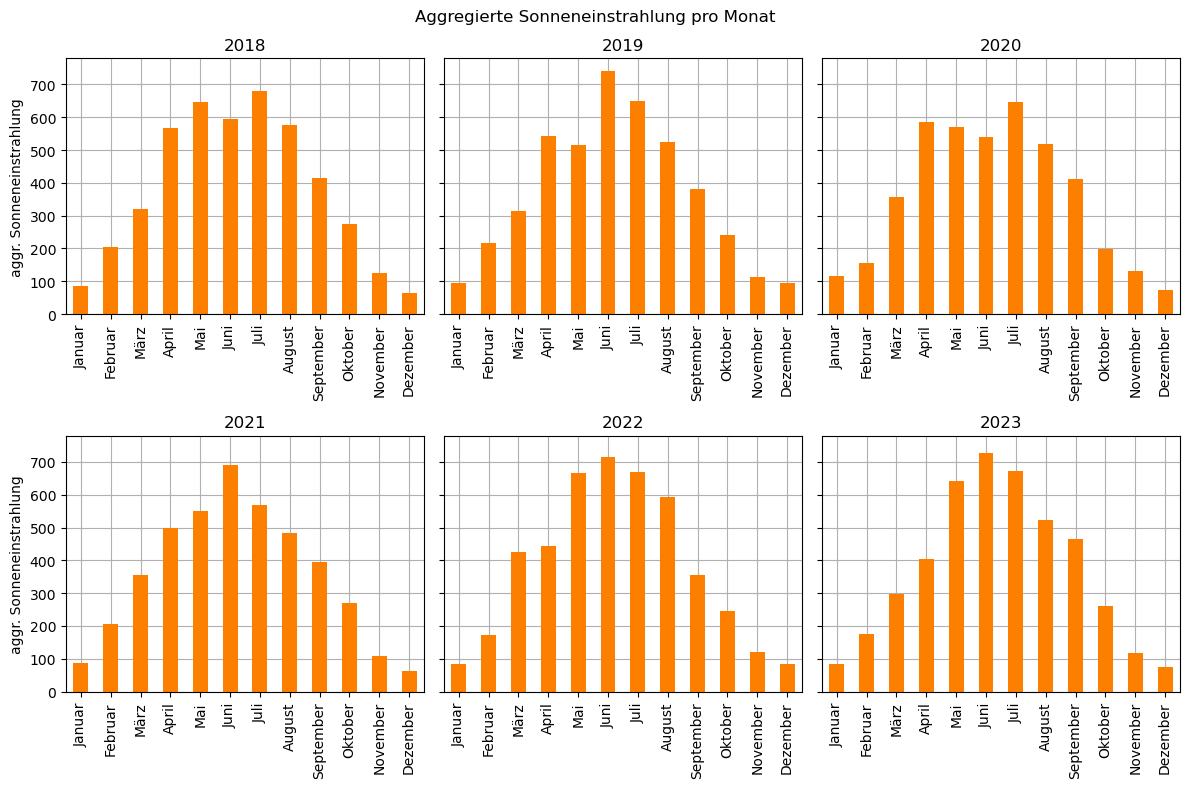

In [41]:
months = ['Januar', 'Februar', 'März', 'April', 'Mai', 'Juni', 'Juli', 'August', 'September', 'Oktober', 'November', 'Dezember']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (12, 8), sharey = 'all')
fig.suptitle("Aggregierte Sonneneinstrahlung pro Monat")

years = {2018, 2019, 2020, 2021, 2022, 2023}
for i , year in enumerate(years): 
    row = i // 3
    col = i % 3
    df_year = df_weather.loc[df_weather['date'].dt.year == year]
    group_year = df_year.groupby(df_year['date'].dt.month)['shortwave_radiation_sum(MJ/m²)'].sum()
    plot = group_year.plot(kind = 'bar', xlabel = '', ylabel = 'aggr. Sonneneinstrahlung', y=col, ax=axes[row, col], title = year, colormap = 'Wistia_r', grid = True)
    plot.set_xticklabels(months)
    plot.set_axisbelow(True)

plt.tight_layout()

### Teilaufgabe_4e

In [42]:
df_weather = df_weather.set_index("date")

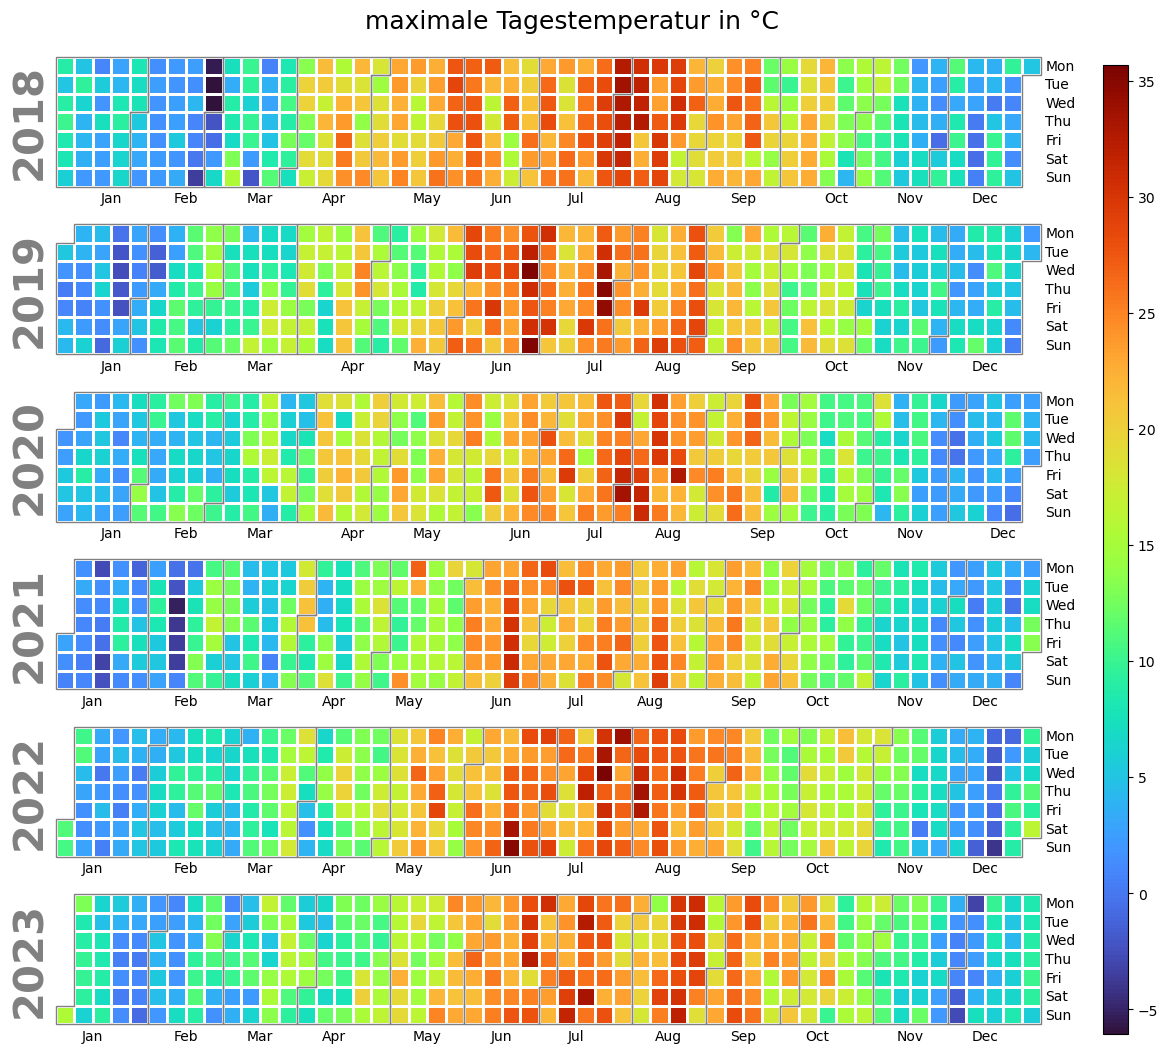

In [43]:
title = 'maximale Tagestemperatur in °C'
fig, axes = calplot.calplot(df_weather['temperature_2m_max(°C)'], cmap  = 'turbo', suptitle = title, suptitle_kws = {'fontsize': 18}, yearlabel_kws = {'fontname':'sans-serif'})

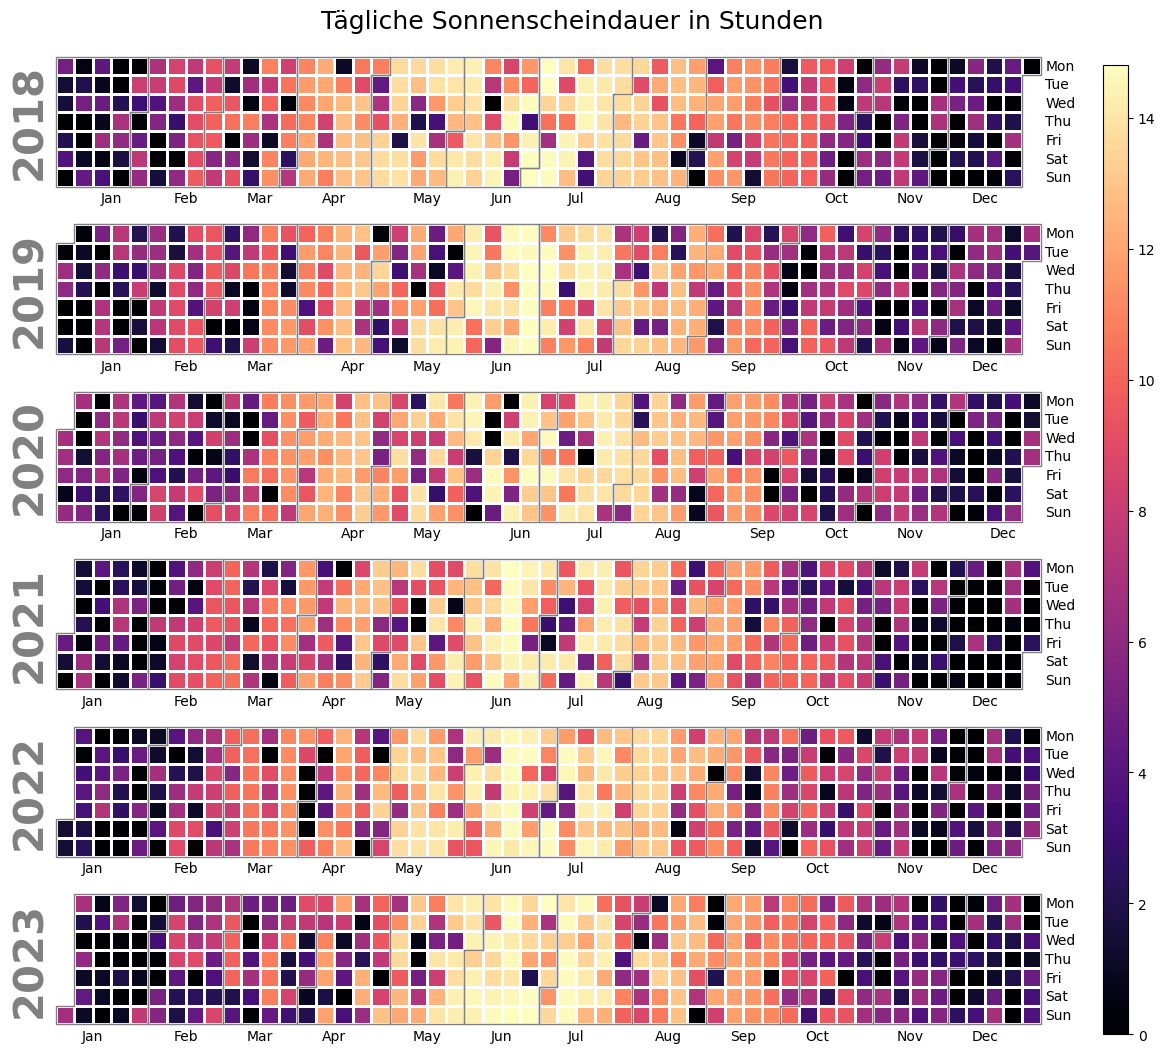

In [44]:
title = 'Tägliche Sonnenscheindauer in Stunden'
fig, axes = calplot.calplot(df_weather['sunshine_duration(h)'], cmap  = 'magma', suptitle = title, suptitle_kws = {'fontsize': 18}, yearlabel_kws = {'fontname':'sans-serif'})

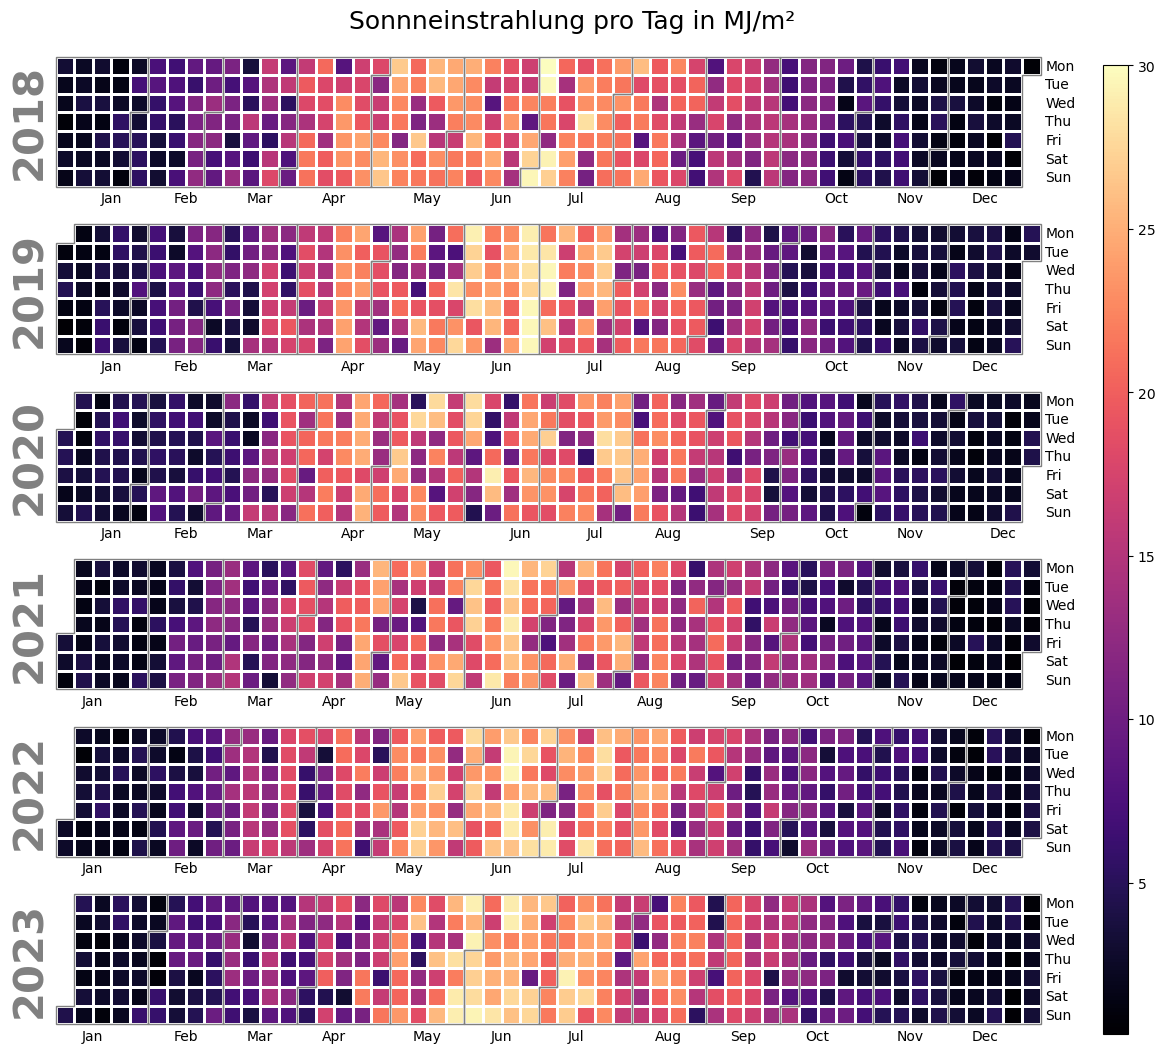

In [45]:
title = 'Sonnneinstrahlung pro Tag in MJ/m²'
fig, axes = calplot.calplot(df_weather['shortwave_radiation_sum(MJ/m²)'], cmap  = 'magma', suptitle = title, suptitle_kws = {'fontsize': 18}, yearlabel_kws = {'fontname':'sans-serif'})

### Teilaufgabe_4f

Je länger die Sonnenscheindauer ist, desto höher ist die Temperatur und desto mehr Sonneinstrahlung liegt vor. Alle drei Variablen steigen zum Sommer an und fallen danach wieder ab. Der Höhepunkt liegt meistens im Juni. Über die Jahre des Betrachtungszeitraums gibt es zwar immer wieder kleine Unterschiede, an sich verhalten sich die Variablen jedoch sehr ähnlich jedes Jahr.

### Teilaufgabe_4g

Zusammenhänge zwischen den sonnenbezogenen Wettervariablen

In [46]:
#Speichern der Variablen in ein eigenes DataFrame
df_sun = pd.DataFrame()
df_sun['Solar(GWh)'] = df_el['Solar(GWh)']
df_sun['shortwave_radiation_sum'] = df_weather['shortwave_radiation_sum(MJ/m²)']
df_sun['daylight_duration'] = df_weather['daylight_duration(h)']
df_sun['sunshine_duration'] = df_weather['sunshine_duration(h)']
df_sun

Solar(GWh)  shortwave_radiation_sum  daylight_duration  \
Tag                                                                  
2018-01-01       31.10                     3.22           8.251632   
2018-01-02       17.20                     1.93           8.269270   
2018-01-03       13.80                     1.90           8.288358   
2018-01-04        9.80                     0.76           8.308922   
2018-01-05       19.40                     1.91           8.331191   
...                ...                      ...                ...   
2023-12-27       51.65                     3.00           8.178308   
2023-12-28       32.45                     1.95           8.188211   
2023-12-29       30.52                     3.14           8.199767   
2023-12-30       47.41                     2.58           8.212935   
2023-12-31       26.35                     3.28           8.227687   

            sunshine_duration  
Tag                            
2018-01-01           4.999405  
2018-01-02           1.411293  
2018-01-03           1.610004  
2018-01-04           0.000000  
2018-01-05           2.095850  
...                       ...  
2023-12-27           3.451000  
2023-12-28           1.000000  
2023-12-29           4.666962  
2023-12-30           3.306888  
2023-12-31           3.674354  

[2191 rows x 4 columns]

In [47]:
#Korrelation zur Darstellung der Zusammenhänge
corrmatrix = df_sun.corr()
fig = px.imshow(corrmatrix, text_auto=True, zmin = 0)
fig.show()

Wie in der Korrelationsmatrix zu erkennen ist, hängen die sonnenbezogenen Wettervariablen stark mit dem in Deutschland erzeugten Solarstrom zusammen. Das macht natürlich auch Sinn, denn je länger die Sonne scheint, desto höher kann die Sonneneinstrahlung werden und desto mehr Solarstrom wird produziert.

# Aufgabe 5

### Teilaufgabe_5a
Einlesen der CSV-Dateien

In [48]:
dataframes = list()
#Festlegen der nicht automatischen dtypes als String, danach direkt Umwandlung von Registierungs- und Inbetriebnahmedatum als dtype datetime
dtypes = {'EinheitMastrNummer': str, 'DatumLetzteAktualisierung': str, 'AnlagenbetreiberMastrNummer': str, 'Bundesland': str, 'Ort': str, 'Registrierungsdatum': str, 'EinheitBetriebsstatus': str, 'Inbetriebnahmedatum': str, 'NameStromerzeugungseinheit': str, 'Strasse': str, 'Hausnummer': str}
parse_dates = ['Registrierungsdatum', 'Inbetriebnahmedatum']

for i in range(1, 39):
    df_temp = pd.read_csv(r"Daten\Stromerzeugungseinheiten\EinheitenSolar_" + str(i) + ".csv", dtype = dtypes, parse_dates = parse_dates)
    dataframes.append(df_temp)
    
df_pv = pd.concat(dataframes)
df_pv = df_pv.rename(columns = {'Bruttoleistung': 'Bruttoleistung(kWp)'})

In [49]:
df_pv

EinheitMastrNummer    DatumLetzteAktualisierung  \
0        SEE984033548619  2020-02-20T16:28:35.2508122   
1        SEE901901460125  2021-07-15T07:54:37.8637095   
2        SEE983679054270  2019-05-28T08:26:38.0316692   
3        SEE978732598938  2020-12-07T08:19:07.9860793   
4        SEE970592691989  2021-01-25T11:18:30.0433603   
...                  ...                          ...   
33286    SEE962666487727  2023-12-31T22:59:11.7688148   
33287    SEE927730726591  2023-12-31T23:10:22.2034456   
33288    SEE968204214268  2023-12-31T23:20:05.7126888   
33289    SEE939492601771  2024-01-01T00:37:48.5759672   
33290    SEE951511396703  2024-01-01T00:25:54.8339677   

      AnlagenbetreiberMastrNummer           Bundesland  Postleitzahl  \
0                 ABR949444220202  Nordrhein-Westfalen       48147.0   
1                 ABR930055871044    Baden-Württemberg       73529.0   
2                 ABR983885950021          Brandenburg       14641.0   
3                 ABR980052996196               Bayern       93080.0   
4                 ABR970373690446             Saarland       66740.0   
...                           ...                  ...           ...   
33286             ABR902834890140          Brandenburg       16827.0   
33287             ABR996492371288        Niedersachsen       37520.0   
33288             ABR934043306792  Nordrhein-Westfalen       45896.0   
33289             ABR959875806043            Thüringen       99310.0   
33290             ABR989059076832               Hessen       63179.0   

                    Ort Registrierungsdatum EinheitBetriebsstatus  \
0               Münster          2019-02-01            In Betrieb   
1      Schwäbisch Gmünd          2019-01-31            In Betrieb   
2                 Nauen          2019-01-31            In Betrieb   
3              Pentling          2019-01-31            In Betrieb   
4             Saarlouis          2019-01-31            In Betrieb   
...                 ...                 ...                   ...   
33286           Krangen          2023-12-31            In Betrieb   
33287          Osterode          2024-01-01            In Betrieb   
33288     Gelsenkirchen          2024-01-01            In Betrieb   
33289          Arnstadt          2024-01-01            In Planung   
33290      Obertshausen          2024-01-01            In Betrieb   

      Inbetriebnahmedatum                 NameStromerzeugungseinheit  \
0              2007-07-20                  Photovoltaikanlage ERWin4   
1              2013-01-31                                  man-power   
2              2016-02-19                                 eigene PVA   
3              2016-12-16  Photovoltaik EFH Löbert - Mattinger Weg 6   
4              2011-12-08                       PV-Anlage 7,2 (Voll)   
...                   ...                                        ...   
33286          2023-11-15                                  PVKrangen   
33287          2023-07-08                       Solaranlage Sperling   
33288          2024-01-01                                Garagendach   
33289                 NaT                                 Dachanlage   
33290          2024-01-01                            Balkonkraftwerk   

       Bruttoleistung(kWp)  AnzahlModule    Lage  Leistungsbegrenzung  \
0                     3.96          22.0   853.0                802.0   
1                     7.41          38.0   853.0                803.0   
2                     5.04          16.0   853.0                803.0   
3                     6.36          24.0   853.0               1535.0   
4                     7.20          30.0   853.0                802.0   
...                    ...           ...     ...                  ...   
33286                10.60          25.0   853.0                802.0   
33287                14.76          36.0   853.0                802.0   
33288                 0.80           2.0  2961.0                803.0   
33289                 2.64      

In [50]:
df_pv.dtypes

EinheitMastrNummer                     object
DatumLetzteAktualisierung              object
AnlagenbetreiberMastrNummer            object
Bundesland                             object
Postleitzahl                          float64
Ort                                    object
Registrierungsdatum            datetime64[ns]
EinheitBetriebsstatus                  object
Inbetriebnahmedatum            datetime64[ns]
NameStromerzeugungseinheit             object
Bruttoleistung(kWp)                   float64
AnzahlModule                          float64
Lage                                  float64
Leistungsbegrenzung                   float64
Hauptausrichtung                      float64
Strasse                                object
Hausnummer                             object
Laengengrad                           float64
Breitengrad                           float64
dtype: object

### Teilaufgabe_5b
Untersuchen auf Datenqualität, Vorbereitung für weitere Analysen

1. Untersuchung auf fehlende Werte

In [51]:
df_pv.isnull().sum()

EinheitMastrNummer                   0
DatumLetzteAktualisierung            0
AnlagenbetreiberMastrNummer       6354
Bundesland                          33
Postleitzahl                         2
Ort                                  2
Registrierungsdatum                  0
EinheitBetriebsstatus                0
Inbetriebnahmedatum              59043
NameStromerzeugungseinheit          12
Bruttoleistung(kWp)                  0
AnzahlModule                     87024
Lage                                56
Leistungsbegrenzung             100832
Hauptausrichtung                 56651
Strasse                        3537205
Hausnummer                     3544485
Laengengrad                    3524840
Breitengrad                    3524840
dtype: int64

Die meisten Einträge fehlen bei: Strasse, Hausnummer, Laengen- und Breitengrad (je über 3500000). Diese Daten sind für unsere Analysen allerdings auch irrelevant, also entfernen wir die Spalten insgesamt.

In [52]:
df_pv = df_pv.drop(columns = ['Strasse', 'Hausnummer', 'Laengengrad', 'Breitengrad'])

Andere häufig fehlende Einträge sind: 
* Leistungsbegrenzung (100832), 
* AnzahlModule (87024), 
* Inbetriebnahmedatum (59043), 
* Hauptausrichtung (56651), 
* AnlagenbetreiberMastrNummer (6354).

Davon ist für uns nur das Inbetriebnahmedatum relevant. Wir entfernen erstmal alle Anlagen, die noch in Planung sind und daher kein Inbetriebnahmedatum haben.

In [53]:
df_pv['EinheitBetriebsstatus'].value_counts()

In Betrieb                   3661547
In Planung                     59031
Endgültig stillgelegt          10989
Vorübergehend stillgelegt       1724
Name: EinheitBetriebsstatus, dtype: int64

In [54]:
df_pv = df_pv.loc[df_pv['EinheitBetriebsstatus'] != 'In Planung']

In [55]:
df_pv.isnull().sum()

EinheitMastrNummer                 0
DatumLetzteAktualisierung          0
AnlagenbetreiberMastrNummer     6354
Bundesland                        24
Postleitzahl                       2
Ort                                2
Registrierungsdatum                0
EinheitBetriebsstatus              0
Inbetriebnahmedatum               12
NameStromerzeugungseinheit        11
Bruttoleistung(kWp)                0
AnzahlModule                   85875
Lage                               0
Leistungsbegrenzung            96663
Hauptausrichtung               54368
dtype: int64

Nach Entfernung von allen Anlagen, die noch nicht in Betrieb sind fehlen beim Inbetriebnahmedatum nur noch 12 Werte.

Wir droppen die Reihen, die jetzt noch übrig sind, die in den Spalten "Bundesland", 'NameStromerzeugungseinheit' oder "Inbetriebnahme" fehlende Werte haben. Das sind für Bundesland 24 Reihen, für NameStromerzeugungseinheit 11 und für Inbetriebnahme 12, also im Vergleich zu unserer Gesamtzahl verwerfbar wenige. 

In [56]:
df_pv = df_pv.drop(df_pv[(df_pv['Inbetriebnahmedatum'].isnull()) | (df_pv['Bundesland'].isnull())].index )

In [57]:
df_pv.isnull().sum()

EinheitMastrNummer                 0
DatumLetzteAktualisierung          0
AnlagenbetreiberMastrNummer     6350
Bundesland                         0
Postleitzahl                       0
Ort                                0
Registrierungsdatum                0
EinheitBetriebsstatus              0
Inbetriebnahmedatum                0
NameStromerzeugungseinheit        11
Bruttoleistung(kWp)                0
AnzahlModule                   85851
Lage                               0
Leistungsbegrenzung            96620
Hauptausrichtung               54348
dtype: int64

2) Untersuchung auf Duplikate: Keine Duplikate

In [58]:
df_pv['EinheitMastrNummer'].duplicated().sum()

0

### Teilaufgabe_5c

In [59]:
print("Photovoltaikanlagen in Betrieb in Deutschland:", df_pv.loc[df_pv['EinheitBetriebsstatus'] == "In Betrieb"]['EinheitBetriebsstatus'].count())

Photovoltaikanlagen in Betrieb in Deutschland: 3660228


In [60]:
print("Photovoltaikanlagen pro Bundesland")
df_pv.groupby('Bundesland')['EinheitBetriebsstatus'].value_counts()

Photovoltaikanlagen pro Bundesland


Bundesland                       EinheitBetriebsstatus    
Ausschließliche Wirtschaftszone  In Betrieb                        3
Baden-Württemberg                In Betrieb                   617761
                                 Endgültig stillgelegt          1802
                                 Vorübergehend stillgelegt       210
Bayern                           In Betrieb                   936126
                                 Endgültig stillgelegt          2554
                                 Vorübergehend stillgelegt       346
Berlin                           In Betrieb                    25856
                                 Endgültig stillgelegt           181
                                 Vorübergehend stillgelegt        31
Brandenburg                      In Betrieb                   102589
                                 Endgültig stillgelegt           276
                                 Vorübergehend stillgelegt        42
Bremen                           In Betrieb 

In [61]:
#Weiterarbeit nur noch mit den Anlagen, die aktuell in Betrieb sind. 
df_pv = df_pv.loc[df_pv['EinheitBetriebsstatus'] == 'In Betrieb']

### Teilaufgabe_5d

In [62]:
bruttoleistungen_mittelwert = df_pv['Bruttoleistung(kWp)'].mean() 
bruttoleistungen_median = df_pv['Bruttoleistung(kWp)'].median()

print("Bruttoleistung Mittelwert:", bruttoleistungen_mittelwert)
print("Bruttoleistung Median:", bruttoleistungen_median)

Bruttoleistung Mittelwert: 22.326986611269117
Bruttoleistung Median: 8.56


Median und Mittelwert unterscheiden sich stark. Es gibt also starke Outlier, die den Mittelwert nach oben verzerren(siehe nächste Teilaufgabe).

### Teilaufgabe_5e

10 Anlagen mit der höchsten Bruttoleistung

In [63]:
columns = ['Bruttoleistung(kWp)', 'EinheitMastrNummer', 'Bundesland', 'Registrierungsdatum','Inbetriebnahmedatum', 'NameStromerzeugungseinheit', 'AnzahlModule']
best_bruttoleistung = df_pv[columns].sort_values(by = 'Bruttoleistung(kWp)', ascending = False)
best_bruttoleistung.head(10)

Bruttoleistung(kWp) EinheitMastrNummer              Bundesland  \
59384            153131.42    SEE936162158023             Brandenburg   
58856            150983.04    SEE908707111015             Brandenburg   
4238             109712.93    SEE971255740181                 Sachsen   
24265             88680.54    SEE905807996023  Mecklenburg-Vorpommern   
24261             82924.14    SEE920687311094  Mecklenburg-Vorpommern   
54182             70863.87    SEE968366210313  Mecklenburg-Vorpommern   
21292             63060.96    SEE998722352005             Brandenburg   
58238             62147.28    SEE993157584229             Brandenburg   
44111             61838.40    SEE996455607225             Brandenburg   
29411             60261.96    SEE987833345068             Brandenburg   

      Registrierungsdatum Inbetriebnahmedatum  \
59384          2022-02-15          2022-02-10   
58856          2022-03-09          2022-02-23   
4238           2023-12-07          2023-12-06   
24265          2021-12-27          2021-12-20   
24261          2021-12-27          2021-12-20   
54182          2021-05-12          2021-04-21   
21292          2021-02-11          2021-02-02   
58238          2021-01-13          2020-12-17   
44111          2020-12-13          2020-11-11   
29411          2023-07-21          2023-07-19   

            NameStromerzeugungseinheit  AnzahlModule  
59384             Solarpark Gottesgabe      350064.0  
58856             Solarpark Alttrebbin      345072.0  
4238   SILUX Solarpark 2 GmbH ＆ Co. KG      191376.0  
24265                     TG_Trafo 105      216294.0  
24261                     TG_Trafo 104      202254.0  
54182                        Gaarz 2.1      214739.0  
21292          PV Weesow-Wilmersdorf 3      157248.0  
58238         PV Weesow-Willmersdorf 1      153504.0  
44111         PV Weesow-Willmersdorf 2      153504.0  
29411     PV Park Boitzenburger Land 1      106770.0

### Teilaufgabe_5f

Ermittlung und Visualisierung des monatlichen Zubaus der Bruttoleistung seit 2015

In [64]:
#Sortierung nach Jahren ab 2015 bis inklusive Ende 2023
since_2015 = df_pv.loc[(df_pv['Inbetriebnahmedatum'].dt.year >= 2015) & (df_pv['Inbetriebnahmedatum'].dt.year <= 2023)]
since_2015 = since_2015[['Inbetriebnahmedatum', 'Bruttoleistung(kWp)']]
since_2015 = since_2015.sort_values(by = 'Inbetriebnahmedatum')
since_2015

Inbetriebnahmedatum  Bruttoleistung(kWp)
78879          2015-01-01               10.000
53359          2015-01-01                9.700
17472          2015-01-01                3.000
14909          2015-01-01                5.500
9447           2015-01-01                3.000
...                   ...                  ...
32735          2023-12-31                3.825
33097          2023-12-31                0.900
32309          2023-12-31                0.800
32463          2023-12-31                0.800
9174           2023-12-31                2.900

[2160868 rows x 2 columns]

In [65]:
#Zusammensummierung der Bruttoleistung der inbetrieb genommenen PV-Anlagen pro Monat jedes Jahres
per = since_2015['Inbetriebnahmedatum'].dt.to_period("M")
group_months = since_2015.groupby(per)
group_months = group_months.sum()
#Umrechnung der kWp in MWp zum Vereinfachen des Ablesung der Zahlen im Diagramm
group_months['Bruttoleistung(MWp)'] = group_months['Bruttoleistung(kWp)']/1000
group_months = group_months.drop(columns = ['Bruttoleistung(kWp)'])
group_months

Bruttoleistung(MWp)
Inbetriebnahmedatum                     
2015-01                       125.572530
2015-02                        71.331969
2015-03                        95.180141
2015-04                        91.238204
2015-05                        93.745656
...                                  ...
2023-08                      1285.314941
2023-09                      1131.086564
2023-10                      1384.763471
2023-11                      1222.301092
2023-12                       787.735323

[108 rows x 1 columns]

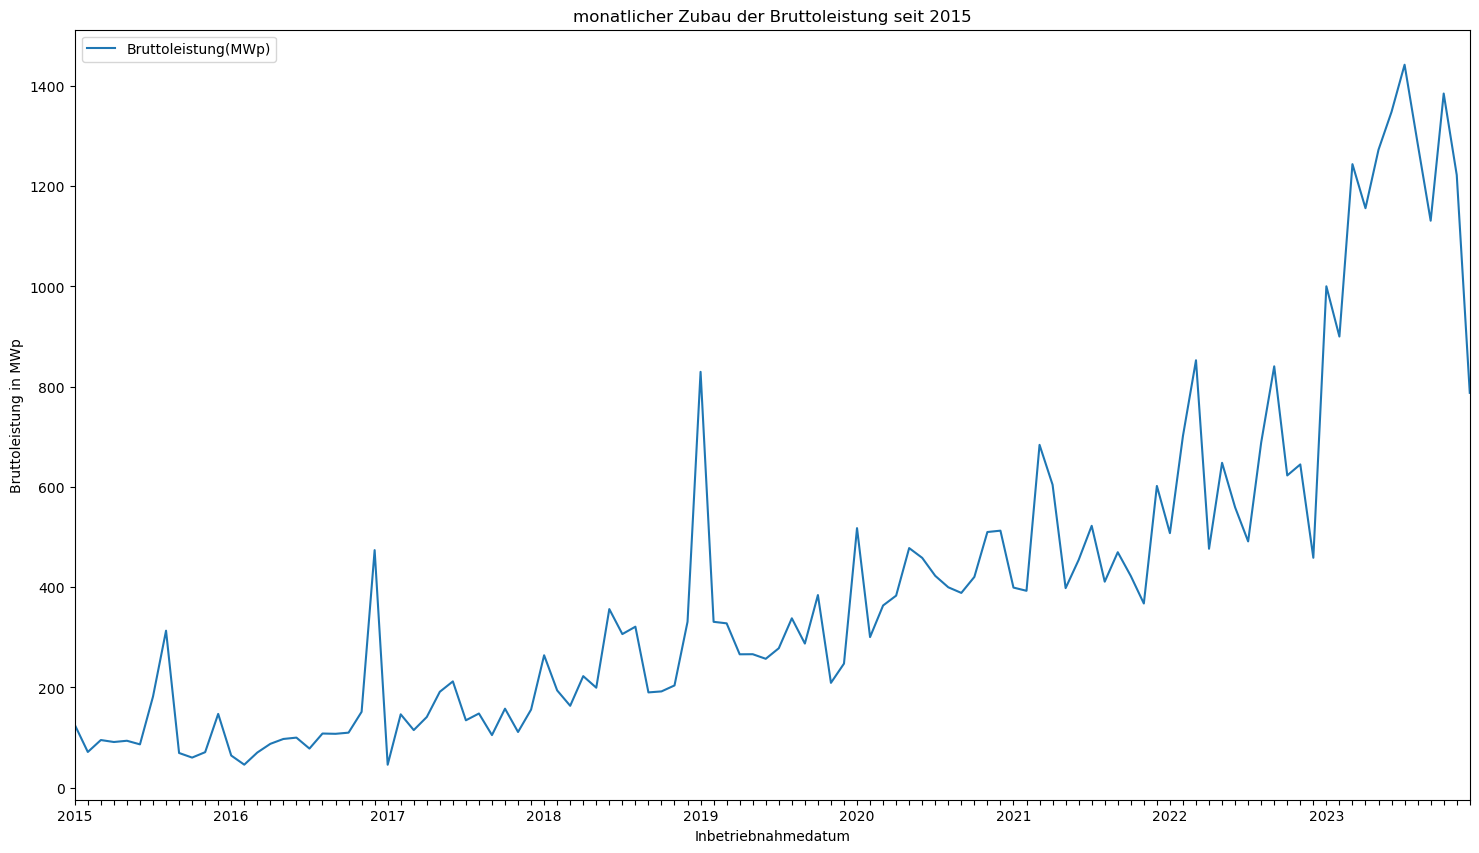

In [66]:
fig = group_months.plot(kind = 'line', title = 'monatlicher Zubau der Bruttoleistung seit 2015', figsize=(18,10), xticks = group_months.index, ylabel = "Bruttoleistung in MWp")
legend = fig.legend(loc = "upper left")

Entwicklung: 
* Der monatliche Zubau steigt allgemein seit 2015 an, was sich erklären lässt durch sinkende PV-Anlagen Preise und den politischen Fokus auf erneuerbare Energien. Dazu kommen Förderungen und CO2-Steuer, welche Solar-Strom immer attraktiver machen. [[3]](https://www.ise.fraunhofer.de/de/veroeffentlichungen/studien/aktuelle-fakten-zur-photovoltaik-in-deutschland.html)  
* Oktober 2015 - Dezember 2016 wurden die Fördermittel nicht abgesenkt, da kein starker Zubau war. Dennoch lässt sich durch die ersten Fördermittel in 2015 der kurze Peak erklären. Außerdem könnten die der Fördermittel den Zubau Ende 2016 verursacht haben. [[4]](https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Allgemeines/Presse/Pressemitteilungen/2016/160930_PV.pdf?__blob=publicationFile&v=1)
* November 2018 wurden die VDE Normen geändert: Mit den neuen Normen hat man neue teurere Zähler gebraucht und musste alte abschaffen.[[5]](https://www.photovoltaik.eu/recht/neue-vde-ar-n-4105)
* Peak 2019: Einspeisevergütungen/ Förderungen wurden massiv runter gesetzt in 2019. Ursprünglich war dies bereits für Januar 2019 geplant, wurde aber etwas nach hinten verschoben. Also wurde schnell noch vor den Änderungen gebaut. [[6]](https://www.deutsche-handwerks-zeitung.de/solarstrom-weniger-foerderung-fuer-grosse-anlagen-ab-2019-135394/)
* In 2022 kam es durch Lieferengpässe, erhöhte Rohstoffpreise und geopolitische Unsicherheit eine Preiserhöhung, was den Abfall Mitte 2022 erklärt.  Danach ist der Preis wieder gefallen, weshalb es zu dem erneuten Anstieg kommt.[[7]](https://www.zolar.de/blog/preisentwicklung-photovoltaik)
* stärkster Zubau (2023): Hohe Energiepreise machen es attraktiver mit Hilfe von PV-Anlagen eigenen Strom herzustellen. Vor allem, da die Strom-Preisbremse Anfang 2024 aufhört. [[2]](https://www.ise.fraunhofer.de/de/veroeffentlichungen/studien/aktuelle-fakten-zur-photovoltaik-in-deutschland.html) [[8]](https://www.bundesnetzagentur.de/DE/Vportal/Energie/EnergiepreiseSpezial/2024/start.html) 

### Teilaufgabe_5g

In [67]:
since_2000 = df_pv.loc[df_pv['Inbetriebnahmedatum'].dt.year >= 2000]
since_2000 = since_2000[['Inbetriebnahmedatum', 'Bruttoleistung(kWp)']]
since_2000 = since_2000.sort_values(by = 'Inbetriebnahmedatum')
per = since_2000['Inbetriebnahmedatum'].dt.to_period("M")
group_months = since_2000.groupby(per)
group_months = group_months.sum()
group_months = group_months.cumsum()
group_months['Bruttoleistung(MWp)'] = group_months['Bruttoleistung(kWp)']/1000
group_months['Bruttoleistung(GWp)'] = group_months['Bruttoleistung(kWp)']/1000/1000
group_months = group_months.drop(columns = ['Bruttoleistung(MWp)', 'Bruttoleistung(kWp)'])

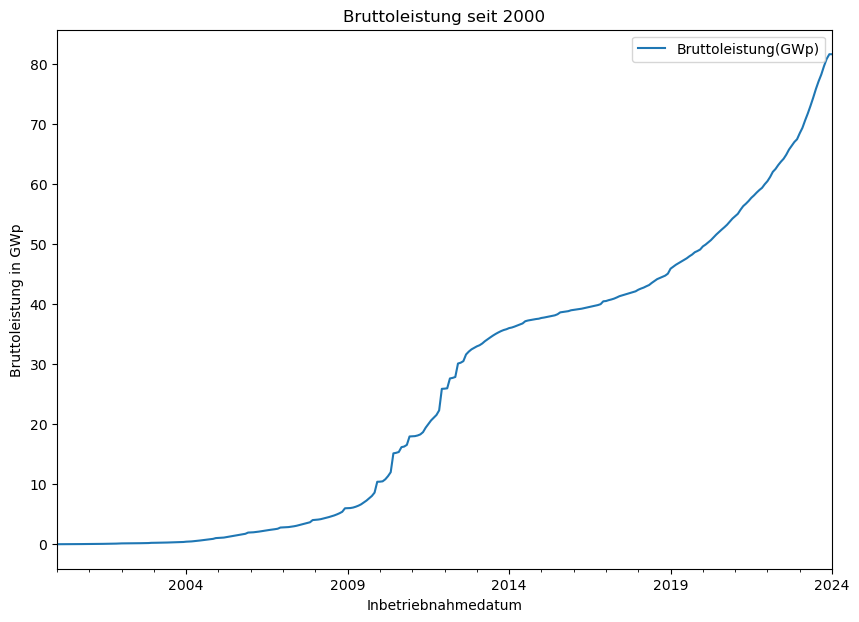

In [68]:
fig = group_months.plot(kind = 'line', title = 'Bruttoleistung seit 2000', ylabel = "Bruttoleistung in GWp", figsize = (10,7))

Die aktuell installierte Bruttoleistung liegt in Deutschland bei ca. 81GWp. Seit 2019 lässt sich ein starker Anstieg beobachten. Von 2009 bis 2014 gab es ebenfalls einen starken Anstieg, dann in 2014 gab es einen starken Abfall des Zubaus und dadurch entsteht das Plateau von 2014-2019. 

### Teilaufgabe_5h

Berechnen der derzeit installierten Bruttoleistung pro Bundesland

In [69]:
bundeslaender = df_pv.groupby('Bundesland')['Bruttoleistung(kWp)'].sum()
bundeslaender = bundeslaender.reset_index()
bundeslaender['Bruttoleistung(GWp)'] = bundeslaender['Bruttoleistung(kWp)']/1000/1000
bundeslaender = bundeslaender.drop(columns = 'Bruttoleistung(kWp)')
bundeslaender

Bundesland  Bruttoleistung(GWp)
0   Ausschließliche Wirtschaftszone             0.000003
1                 Baden-Württemberg            10.170394
2                            Bayern            22.256876
3                            Berlin             0.271644
4                       Brandenburg             6.580525
5                            Bremen             0.095756
6                           Hamburg             0.125440
7                            Hessen             3.735959
8            Mecklenburg-Vorpommern             3.782182
9                     Niedersachsen             7.009584
10              Nordrhein-Westfalen             9.716998
11                  Rheinland-Pfalz             4.090077
12                         Saarland             0.854793
13                          Sachsen             3.493243
14                   Sachsen-Anhalt             4.148092
15               Schleswig-Holstein             2.971237
16                        Thüringen             2.419057

In [70]:
replace_dict = {'Baden-Württemberg': 'DE-BW', 'Bayern': 'DE-BY', 'Berlin': 'DE-BE', 'Brandenburg': 'DE-BB', 'Bremen': 'DE-HB', 'Hamburg': 'DE-HH', 'Hessen': 'DE-HE', 'Mecklenburg-Vorpommern': 'DE-MV', 'Niedersachsen': 'DE-NI', 'Nordrhein-Westfalen': 'DE-NW', 'Rheinland-Pfalz': 'DE-RP', 'Saarland': 'DE-SL', 'Sachsen': 'DE-SN', 'Sachsen-Anhalt': 'DE-ST', 'Schleswig-Holstein': 'DE-SH', 'Thüringen': 'DE-TH'}
bundeslaender = bundeslaender.replace(replace_dict)

Darstellung der Bruttoleistung pro Bundesland in einer Choroplethen-Karte

In [71]:
m = folium.Map(location=[51.1657,10.4515], zoom_start=5.5)

folium.Choropleth(
    geo_data= r'Daten\bundeslaender_geo.json',
    name='choropleth',
    data=bundeslaender,
    columns=['Bundesland', 'Bruttoleistung(GWp)'],
    key_on='feature.properties.id',
    fill_color='Greens',
    fill_opacity=0.7,
    line_opacity=0.2,
    nan_fill_color="purple",
    nan_fill_opacity=0.4,
    legend_name='Bruttoleistung(GWp)'
).add_to(m)

folium.LayerControl().add_to(m)

m

### Teilaufgabe_5i

Wordcloud der Namen der PV-Anlagen

In [72]:
df_wordcloud = df_pv.drop(df_pv[(df_pv['NameStromerzeugungseinheit'].isnull())].index )

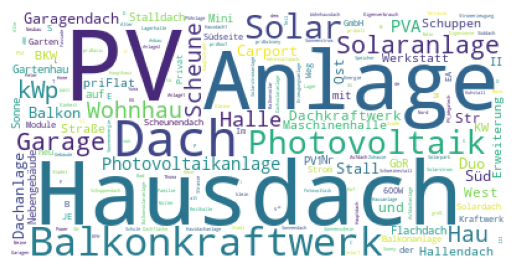

In [73]:
names = " ".join(i for i in df_wordcloud['NameStromerzeugungseinheit'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", collocations = False).generate(names)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Teilaufgabe_5j

Zusammenführen der Solarstromerzeugungsdaten und der Bruttoleistung pro Tag in ein DataFrame.

In [74]:
df_erzeugung_leistung = pd.DataFrame()
df_erzeugung_leistung['Solar(GWh)'] = df_el['Solar(GWh)']
df_erzeugung_leistung

Solar(GWh)
Tag                   
2018-01-01       31.10
2018-01-02       17.20
2018-01-03       13.80
2018-01-04        9.80
2018-01-05       19.40
...                ...
2023-12-27       51.65
2023-12-28       32.45
2023-12-29       30.52
2023-12-30       47.41
2023-12-31       26.35

[2191 rows x 1 columns]

In [75]:
df_pv_bruttoleistungen = df_pv.groupby('Inbetriebnahmedatum')['Bruttoleistung(kWp)'].sum()
df_pv_bruttoleistungen = df_pv_bruttoleistungen.cumsum()
since_2018 = df_pv.loc[df_pv['Inbetriebnahmedatum'].dt.year >= 2018]
df_pv_bruttoleistungen

Inbetriebnahmedatum
1900-01-01    2.504000e+01
1900-02-24    3.604000e+01
1904-04-13    4.264000e+01
1905-11-08    4.754000e+01
1906-07-27    5.315000e+01
                  ...     
2023-12-28    8.171250e+07
2023-12-29    8.171818e+07
2023-12-30    8.172091e+07
2023-12-31    8.172186e+07
2024-01-01    8.172186e+07
Name: Bruttoleistung(kWp), Length: 11897, dtype: float64

In [76]:
#Mergen von Bruttoleistung und Solarstrom
df_erzeugung_leistung = pd.merge(left = df_erzeugung_leistung, right = df_pv_bruttoleistungen, how = 'left', left_on = df_erzeugung_leistung.index, right_on = df_pv_bruttoleistungen.index)
#Index zu Inbetriebnahmedatum umändern, Bruttoleistung umrechnen zu GWp
df_erzeugung_leistung = df_erzeugung_leistung.rename(columns = {'key_0': 'Inbetriebnahmedatum'})
df_erzeugung_leistung = df_erzeugung_leistung.set_index('Inbetriebnahmedatum') 
df_erzeugung_leistung['Bruttoleistung(GWp)'] = df_erzeugung_leistung['Bruttoleistung(kWp)']/1000/1000
df_erzeugung_leistung = df_erzeugung_leistung.drop(columns = ['Bruttoleistung(kWp)'])
df_erzeugung_leistung

Solar(GWh)  Bruttoleistung(GWp)
Inbetriebnahmedatum                                 
2018-01-01                31.10            42.205488
2018-01-02                17.20            42.234524
2018-01-03                13.80            42.242417
2018-01-04                 9.80            42.250772
2018-01-05                19.40            42.260813
...                         ...                  ...
2023-12-27                51.65            81.706187
2023-12-28                32.45            81.712498
2023-12-29                30.52            81.718183
2023-12-30                47.41            81.720906
2023-12-31                26.35            81.721859

[2191 rows x 2 columns]

Speichern des DataFrame als CSV Datei

In [77]:
df_erzeugung_leistung.to_csv('erzeugung_leistung.csv')

# Aufgabe 6

### Teilaufgabe_6a

Daten zusammenführen

In [78]:
df_model = pd.DataFrame()
df_model = df_sun #Dataframe mit Solar(GWh), shortwave_radiation_sum, daylight_duration, sunshine_duration aus Aufgabe 4
df_model['Bruttoleistung(GWp)'] = df_erzeugung_leistung['Bruttoleistung(GWp)'] 
df_model = df_model.reset_index()
df_model = df_model.set_index('Tag')
df_model

Solar(GWh)  shortwave_radiation_sum  daylight_duration  \
Tag                                                                  
2018-01-01       31.10                     3.22           8.251632   
2018-01-02       17.20                     1.93           8.269270   
2018-01-03       13.80                     1.90           8.288358   
2018-01-04        9.80                     0.76           8.308922   
2018-01-05       19.40                     1.91           8.331191   
...                ...                      ...                ...   
2023-12-27       51.65                     3.00           8.178308   
2023-12-28       32.45                     1.95           8.188211   
2023-12-29       30.52                     3.14           8.199767   
2023-12-30       47.41                     2.58           8.212935   
2023-12-31       26.35                     3.28           8.227687   

            sunshine_duration  Bruttoleistung(GWp)  
Tag                                                 
2018-01-01           4.999405            42.205488  
2018-01-02           1.411293            42.234524  
2018-01-03           1.610004            42.242417  
2018-01-04           0.000000            42.250772  
2018-01-05           2.095850            42.260813  
...                       ...                  ...  
2023-12-27           3.451000            81.706187  
2023-12-28           1.000000            81.712498  
2023-12-29           4.666962            81.718183  
2023-12-30           3.306888            81.720906  
2023-12-31           3.674354            81.721859  

[2191 rows x 5 columns]

Datensatz als CSV-Datei speichern.

In [79]:
df_model.to_csv('dataset_model.csv')

Train-Test-Split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_model.drop(columns = ['Solar(GWh)']), df_model['Solar(GWh)'], test_size = 0.4, train_size = 0.6)

Modelltraining

In [81]:
model = LinearRegression()
model.fit(X_train, y_train)

regression_line = model.predict(X_train)

In [82]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_error = mean_absolute_percentage_error(y_train, train_predictions)
test_error = mean_absolute_percentage_error(y_test, test_predictions)

print("Mittlerer relativer Fehler auf Trainingsdatensatz:", train_error)
print("Mittlerer relativer Fehler auf Testdatensatz:", test_error)

Mittlerer relativer Fehler auf Trainingsdatensatz: 0.2820974170106691
Mittlerer relativer Fehler auf Testdatensatz: 0.26715708995345755


Der mittlere relative Fehler liegt zwischen 25 und 30%. 

### Teilaufgabe_6b

In [83]:
df_model_b = df_model.reset_index()
day_2901 = df_model_b.loc[(df_model_b['Tag'].dt.month == 1) & (df_model_b['Tag'].dt.day == 29)]
day_3001 = df_model_b.loc[(df_model_b['Tag'].dt.month == 1) & (df_model_b['Tag'].dt.day == 30)]
day_3101 = df_model_b.loc[(df_model_b['Tag'].dt.month == 1) & (df_model_b['Tag'].dt.day == 31)]
day_0102 = df_model_b.loc[(df_model_b['Tag'].dt.month == 2) & (df_model_b['Tag'].dt.day == 1)]
day_0202 = df_model_b.loc[(df_model_b['Tag'].dt.month == 2) & (df_model_b['Tag'].dt.day == 2)]
day_0302 = df_model_b.loc[(df_model_b['Tag'].dt.month == 2) & (df_model_b['Tag'].dt.day == 3)]
day_0402 = df_model_b.loc[(df_model_b['Tag'].dt.month == 2) & (df_model_b['Tag'].dt.day == 4)]

day_0402

Tag  Solar(GWh)  shortwave_radiation_sum  daylight_duration  \
34   2018-02-04       27.60                     5.35           9.551051   
399  2019-02-04       59.90                     7.07           9.539571   
764  2020-02-04       51.50                     5.48           9.522337   
1130 2021-02-04       64.70                     5.27           9.562641   
1495 2022-02-04       35.60                     2.03           9.552636   
1860 2023-02-04       69.76                     6.06           9.539920   

      sunshine_duration  Bruttoleistung(GWp)  
34             6.275132            42.484445  
399            6.534560            45.984401  
764            7.578851            49.730844  
1130           7.785914            54.828248  
1495           0.846342            60.610492  
1860           5.156495            68.666665

In [84]:
df_prognose = pd.DataFrame()
bruttoleistung = df_model.loc['2023-12-31']['Bruttoleistung(GWp)']

# Variablen: Median des selben Tages der letzten Jahre 
days = [day_2901, day_3001, day_3101, day_0102, day_0202, day_0302, day_0402]
dates = ['2024-01-29', '2024-01-30', ' 2024-01-31', '2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04']
date_count = 0
for day in days: 
    entry = pd.DataFrame([{'Tag':pd.to_datetime(dates[date_count]), 'shortwave_radiation_sum': day['shortwave_radiation_sum'].median(), 'daylight_duration':day['daylight_duration'].median(), 'sunshine_duration': day['sunshine_duration'].median(), 'Bruttoleistung(GWp)': bruttoleistung}])
    df_prognose = pd.concat([df_prognose, entry], ignore_index=True)
    date_count = date_count + 1

df_prognose


Tag  shortwave_radiation_sum  daylight_duration  sunshine_duration  \
0 2024-01-29                    2.845           9.235849           1.810194   
1 2024-01-30                    4.180           9.285957           3.750339   
2 2024-01-31                    2.625           9.336750           2.258207   
3 2024-02-01                    2.960           9.388161           0.757769   
4 2024-02-02                    2.775           9.440130           0.980030   
5 2024-02-03                    2.345           9.492592           1.000000   
6 2024-02-04                    5.415           9.545485           6.404846   

   Bruttoleistung(GWp)  
0            81.721859  
1            81.721859  
2            81.721859  
3            81.721859  
4            81.721859  
5            81.721859  
6            81.721859

In [85]:
df_prognose = df_prognose.set_index('Tag')

In [86]:
test = model.predict(df_prognose)

print(test)

[64.15988497 76.24960489 63.30252532 65.59690092 64.57291225 61.47424393
 89.32668924]


Prognosen für Solarstrom in GWh:  
* 29.01.2024: 63.72329016
* 30.01.2024: 75.61016831
* 31.01.2024: 62.9126464
* 01.02.2024: 65.17967879
* 02.02.2024: 64.19033184
* 03.02.2024: 61.16399702
* 04.02.2024: 88.5308845

### Teilaufgabe_6c

Je "neuer" das Datum, zu dem das Modell eine Prognose aufstellen soll, desto größer wird der mittlere Fehler. Wenn man das Modell beispielsweise nur Daten nach 2023 predicten lässt, hat es einen Fehler von 45%. Dies hängt wohl damit zusammen, wie stark die installierte Bruttoleistung ansteigt, wobei der produzierte Solarstrom im Winter relativ gleich bleibt. 

Das Modell wird besser, wenn man nur Sommermonate betrachtet. Der Fehler wird dann reduziert auf ca. 15%. Leider hilft das Trennen von Sommer- und Wintermonaten der Prognose der Wintermonate nicht. 

Die Prognose hängt von den Sonnenvariablen ab. Da diese natürlich für die Zukunft noch nicht bekannt sind, haben wir den Median des selben Tages der letzten 5 Jahre genommen und diesen als Wert der Variable genutzt. Das Modell prognostiziert also auf nicht echten Werten, was den Fehler von 30% vermutlich noch weiter vergrößert. Damit ist das Modell nicht besonders zuverlässig. Für eine bessere Zukunfts-Prognose von Werten, müssen die zugrundeliegenden Variablen selbst verlässlicher sein.

Die Werte der Bruttoleistung steigt durchgehend an, während die sonnenbezogenen Variablen in jedem Jahr schwanken, eben bezogen auf die Jahreszeiten. Die Bruttoleistung ist beispielsweise im Winter genausohoch wie im Sommer, und dennoch wird um einiges weniger Solarstrom hergestellt aufgrund der niedrigeren sonnenbezogenen Variablen. Vielleicht könnte man das Modell verbesern, indem man den sonnenbezogenen Variablen einen größeren Fokus gibt.

Außerdem gibt es im Wetter eine hohe Varianz, wenn man sich nur spezielle Tage anschaut. Ein spezielles Datum hat nicht jedes Jahr das gleiche Wetter. Eine weiter mögliche Verbesserung wäre also vielleicht eine Erweiterung des Prognosezeitraums, von einem speziellen Tag auf beispielsweise eine Woche oder sogar einen Monat, um der Wettervarianz entgegenzuwirken. 

# Quellenverzeichnis 

 [1] [EnBw.com: Offshore-Windparks – alle Fakten zur Windenergie auf See](https://www.enbw.com/unternehmen/eco-journal/offshore-windparks-alle-fakten-zur-windenergie-auf-see.html#:~:text=Ende%202021%20war%20die%20Anzahl,an%20Offshore-Anlagen%20mit%201.501.)

[2] [Historical Weather API](https://open-meteo.com/en/docs/historical-weather-api)

[3] [Fraunhofer: Aktuelle Fakten zur Photovoltaik in Deutschland](https://www.ise.fraunhofer.de/de/veroeffentlichungen/studien/aktuelle-fakten-zur-photovoltaik-in-deutschland.html)

[4] [Bundesnetzagentur: Fördersätze für Photovoltaik-Anlagen in der
Festvergütung bleiben stabil](https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Allgemeines/Presse/Pressemitteilungen/2016/160930_PV.pdf?__blob=publicationFile&v=1)

[5] [Photovoltaik.eu: Neue VDE-AR-N 4105](https://www.photovoltaik.eu/recht/neue-vde-ar-n-4105)

[6] [DHZ: Solarstrom: Weniger Förderungen für große Anlagen ab 2019](https://www.deutsche-handwerks-zeitung.de/solarstrom-weniger-foerderung-fuer-grosse-anlagen-ab-2019-135394/)

[7] [Zolar: Preisentwicklung Photovoltaik](https://www.zolar.de/blog/preisentwicklung-photovoltaik)

[8] [Bundesnetzagentur: Preis­än­de­run­gen zum Jah­res­wech­sel 2023/2024](https://www.bundesnetzagentur.de/DE/Vportal/Energie/EnergiepreiseSpezial/2024/start.html)

[^1]: (https://www.enbw.com/unternehmen/eco-journal/offshore-windparks-alle-fakten-zur-windenergie-auf-see.html#:~:text=Ende%202021%20war%20die%20Anzahl,an%20Offshore-Anlagen%20mit%201.501.)